In [1]:
import pandas as pd
import numpy as np
import re # pattern matching

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='whitegrid', font_scale=1.3)

In [2]:
df = pd.read_csv('Clean_data.csv',index_col='Unnamed: 0')
df.head()

,title,location,price(L),rate_persqft,area_insqft,building_status,agent_rating
0,Residential Plot,Maheshwaram,45.00,1111,4050,New,4.6
1,Residential Plot,Kondakal,34.00,2361,1440,New,3.7
2,Residential Plot,Bibinagar,14.19,944,1503,New,4.9
3,Residential Plot,Gachibowli,330.00,3333,9900,New,0.0
4,Residential Plot,Shadnagar,6.72,466,1440,New,4.7


In [3]:
temp = df.title.value_counts().reset_index()
temp.columns = ['title','count']
temp

,title,count
0,Residential Plot,14642
1,3 BHK Apartment,4071
2,2 BHK Apartment,3532
3,2 BHK Independent House,832
4,3 BHK Villa,440
5,4 BHK Villa,422
6,4 BHK Apartment,381
7,1 BHK Apartment,321
8,3 BHK Independent House,232
9,1 BHK Independent House,179


# 1. Title (Types of Property)

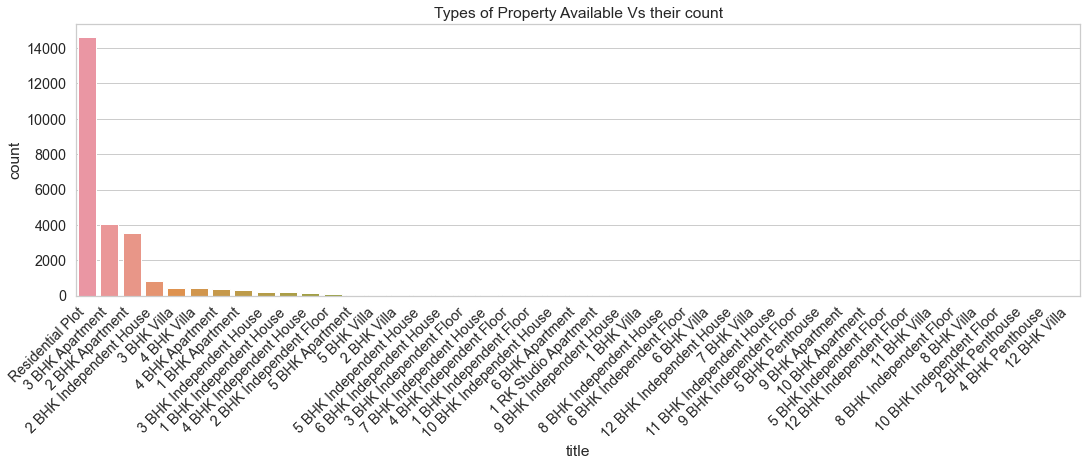

In [4]:
plt.figure(figsize=(18,5))
fig = sns.barplot(x='title', y='count', data=temp )
plt.title('Types of Property Available Vs their count')
plt.setp(fig.get_xticklabels(), rotation=45, horizontalalignment='right');

from figure we can see that highest number of Residential Areas are available for sale followed by 3BHK and 2BHK Apartment.
Lets take a closer look at other types of areas. 

In [5]:
# Function to extract types of areas on sale(Property Type)
def find_String(text_to_search, pattern):
    pattern1 = re.compile(pattern)
    matches = pattern1.findall(text_to_search)
    if len(matches)> 0:
        if matches[0] == pattern:
            
            return True
        else:
            return False
    else :
        return False

temp = df.title.apply(find_String,args=('Residential',))



In [6]:
temp.value_counts()

True     14642
False    11073
Name: title, dtype: int64

## 1.1. Type of Property = 'Residential areas'

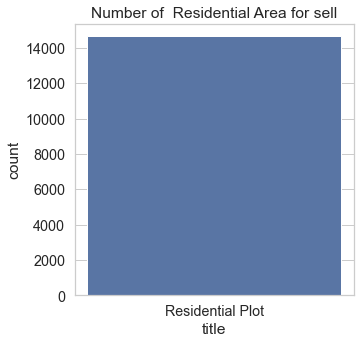

In [7]:
temp =  df.title.apply(find_String,args=('Residential',))
temp = df[temp].title.value_counts().reset_index()
temp.columns = ['title','count']
plt.figure(figsize=(5,5))
fig = sns.barplot(x='title', y='count', data=temp, )
plt.title('Number of  Residential Area for sell');



## 1.2. Type of Property = 'Apartment'

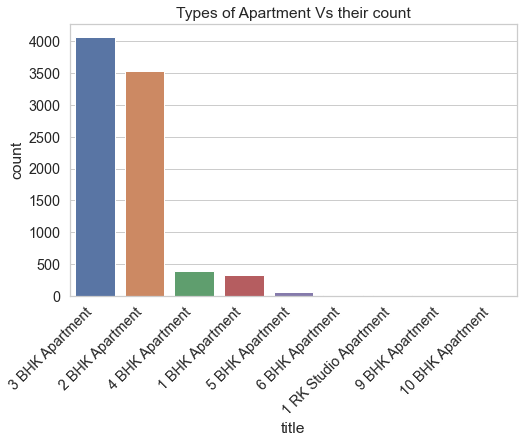

In [174]:
temp =  df.title.apply(find_String,args=('Apartment',))
temp = df[temp].title.value_counts().reset_index()
temp.columns = ['title','count']
plt.figure(figsize=(8,5))
fig = sns.barplot(x='title', y='count', data=temp, )
plt.title('Types of Apartment Vs their count')
plt.setp(fig.get_xticklabels(), rotation=45, horizontalalignment='right');

There are almost 4000 3Bhk , 3500 2BHK , 200 and lower other type of apartments.

## 1.3. Type of Property = 'Villa'

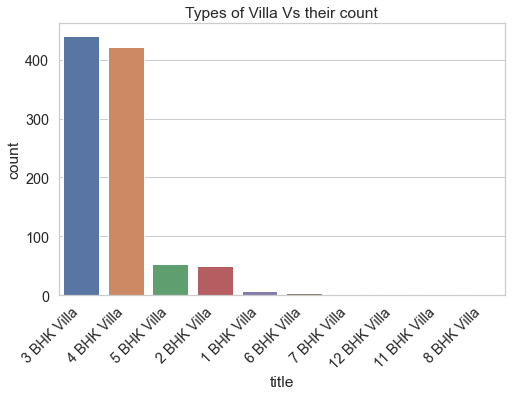

In [9]:
temp =  df.title.apply(find_String,args=('Villa',))
temp = df[temp].title.value_counts().reset_index()
temp.columns = ['title','count']
plt.figure(figsize=(8,5))
fig = sns.barplot(x='title', y='count', data=temp, )
plt.title('Types of Villa Vs their count')
plt.setp(fig.get_xticklabels(), rotation=45, horizontalalignment='right');

* Villa are comparatively less compared to Apartments and Residential areas.
* there are almost 500 3 BHK villas, 420 4BHK villas.
* other types of villas are very few in number

## 1.4. Type of Property = 'Independent House'

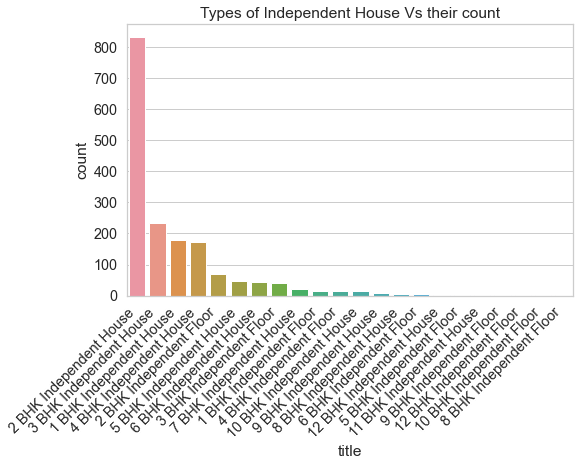

In [10]:

temp =  df.title.apply(find_String,args=('Independent',))
temp = df[temp].title.value_counts().reset_index()
temp.columns = ['title','count']
plt.figure(figsize=(8,5))
fig = sns.barplot(x='title', y='count', data=temp, )
plt.title('Types of Independent House Vs their count')
plt.setp(fig.get_xticklabels(), rotation=45, horizontalalignment='right');

## 1.5. Type of Property = ' PentHouse'

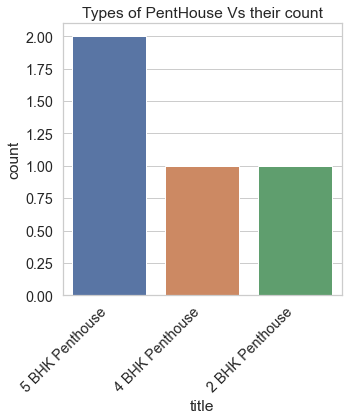

In [11]:
temp =  df.title.apply(find_String,args=('Penthouse',))
temp = df[temp].title.value_counts().reset_index()
temp.columns = ['title','count']
plt.figure(figsize=(5,5))
fig = sns.barplot(x='title', y='count', data=temp)
plt.title('Types of PentHouse Vs their count')
plt.setp(fig.get_xticklabels(), rotation=45, horizontalalignment='right');

Basically there are at the most 4 Pent house available on Sale in Hydrebad 

# 2. Building Status

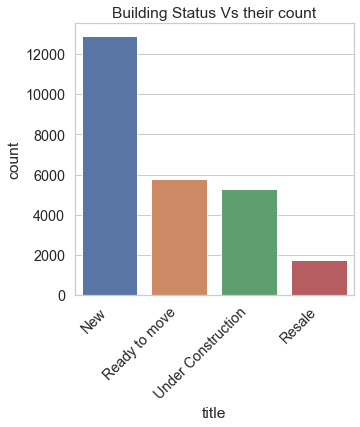

In [12]:
temp = df['building_status'].value_counts().reset_index()
temp.columns = ['title','count']

plt.figure(figsize=(5,5))
fig = sns.barplot(x='title', y='count', data=temp)
plt.title('Building Status Vs their count')
plt.setp(fig.get_xticklabels(), rotation=45, horizontalalignment='right');

* almost 12500 Newly Constructed Areas are on Rent.

* 5900 are Properties Ready to move

# 3. Location

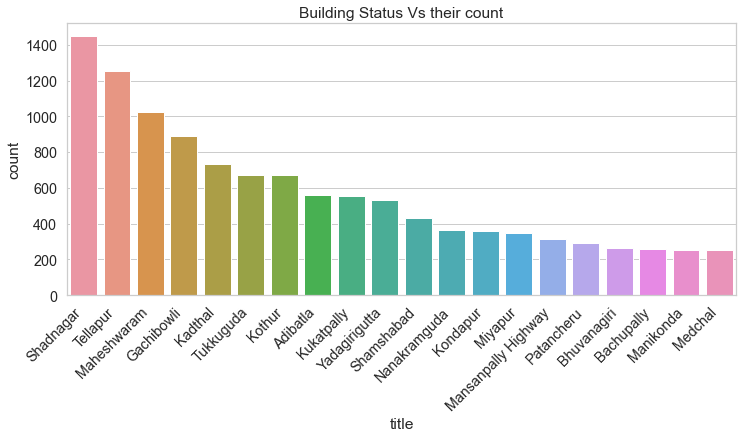

In [22]:
# since the number of locations were almost 900, we will plot top 20
temp = df['location'].value_counts().reset_index().head(20)
temp.columns = ['title','count']


plt.figure(figsize=(12,5))
fig = sns.barplot(x='title', y='count', data=temp)
plt.title('Building Status Vs their count')
plt.setp(fig.get_xticklabels(), rotation=45, horizontalalignment='right');

Shadnagar is an excellent opportunity to invest in future investment plots. In South India it is best regarding location, cost, and proximity to transport, Airport, National Highways, Zoo park, ITIR project and so many establishments.

In [24]:
temp = df['location'].value_counts().reset_index()
temp.columns = ['title','count']
(temp[temp['count']==1]['title']).nunique()

318

In total there are 318 cities in Hydrabad which has only 1 property

# 4. Price per square foot and area in square feet

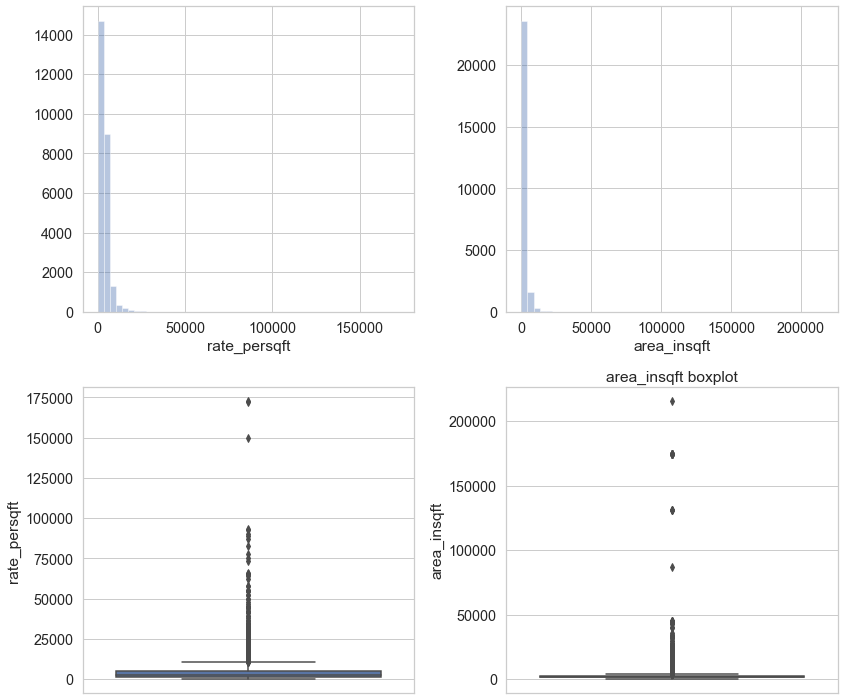

In [185]:
fig, axes = plt.subplots(nrows = 2, ncols=2, figsize=(12,10))

sns.distplot((df['rate_persqft']), hist=True, kde=False, ax = axes[0][0])
plt.title('rate persqft Histogram')


sns.distplot((df['area_insqft']), hist=True, kde=False, ax = axes[0][1])
plt.title('area_insqft Histogram')
plt.tight_layout()

sns.boxplot(y=df['rate_persqft'], ax = axes[1][0])
plt.title('rate persqft boxplot')


sns.boxplot(y=df['area_insqft'], ax = axes[1][1])
plt.title('area_insqft boxplot')
plt.tight_layout()


In [143]:
temp = df['rate_persqft'].value_counts().reset_index()
temp.columns = ['rate_persqft', 'count']
display(temp.sort_values(by='count', ascending=False).head(30))
display(temp.sort_values(by='count',ascending=False).tail(20))


,rate_persqft,count
0,1111,839
1,1666,643
2,611,619
3,944,512
4,1777,427
5,1444,421
6,1333,415
7,1222,388
8,777,359
9,888,263


,rate_persqft,count
3284,8522,1
3269,2798,1
3268,7843,1
3267,13990,1
3258,2480,1
3252,10548,1
3253,305,1
3254,16663,1
3255,159,1
3256,8347,1


* as we can see from histogram of rate_persqft, property with rate_persqft of around 100 - 5000 are easily available.
* there are few property which have high rate_persqft values.


In [148]:
temp = df['area_insqft'].value_counts().reset_index()
temp.columns = ['area_insqft', 'count']
display(temp.sort_values(by='count', ascending=False).head(30))
display(temp.sort_values(by='count',ascending=False).tail(20))

,area_insqft,count
0,1800,2032
1,1350,923
2,1056,826
3,2700,501
4,900,388
5,3600,351
6,1503,335
7,1323,330
8,1200,314
9,1485,286


,area_insqft,count
1637,322,1
1638,16650,1
1639,258,1
1640,2671,1
1641,6781,1
1642,226,1
1643,8874,1
1644,702,1
1646,29520,1
1656,10980,1


* as we can see from histogram of area_insqft, property with area_insqft of around 100 - 5000 are easily available.
* there are few property which have high area_insqft values

# 5. Agent Rating 

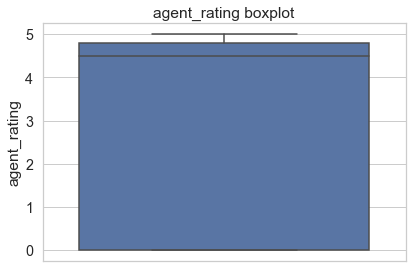

In [190]:
sns.boxplot(y=df['agent_rating'])
plt.title('agent_rating boxplot')
plt.tight_layout()

agent-ratings are between 0-5, with most of the values in range 4-5.
There are 6553 properties whose rating is 0.

# 6. Price

Text(0.5, 1.0, 'Price Histogram')

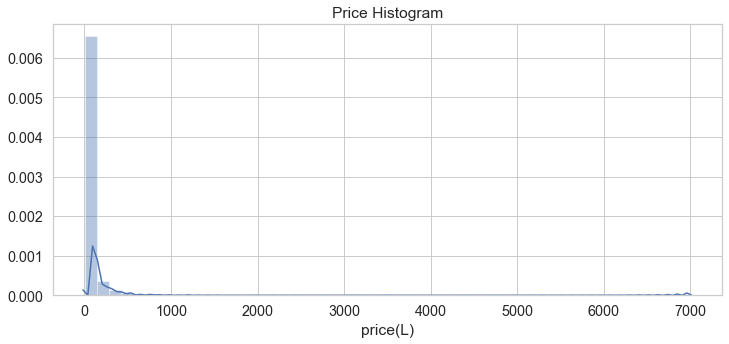

In [107]:
plt.figure(figsize=(12,5))
sns.distplot(df['price(L)'], hist=True, kde=True)
plt.title('Price Histogram')

In [37]:
print(df['price(L)'].min())
print(df['price(L)'].max())

0.16
7000.0


"Thus from above observations of price we consider a price range of 16k to 1cr breaking it into several intervals as follows."

Interval 1 = [0.16 to 10 L]

Interval 2 = [10 to 20 L]

Interval 3 = [20 to 30 L]

Interval 4 = [30 to 40 L]

Interval 5 = [40 to 50 L]

Interval 6 = [50 to 60 L]

Interval 7 = [60 to 70 L]

Interval 8 = [70 to 80 L]

Interval 9 = [80 to 90 L]

Interval 10 = [90 to 100 L]

Interval 11 = [100 to 7000 L]

## 6.1. Price (Interval 1 = [0.16 to 10 L])

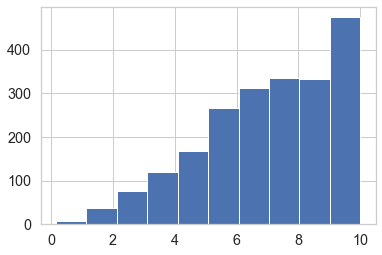

In [244]:
d = df[(df['price(L)']>=0.16) & (df['price(L)']<=10)]
plt.hist(d['price(L)']);

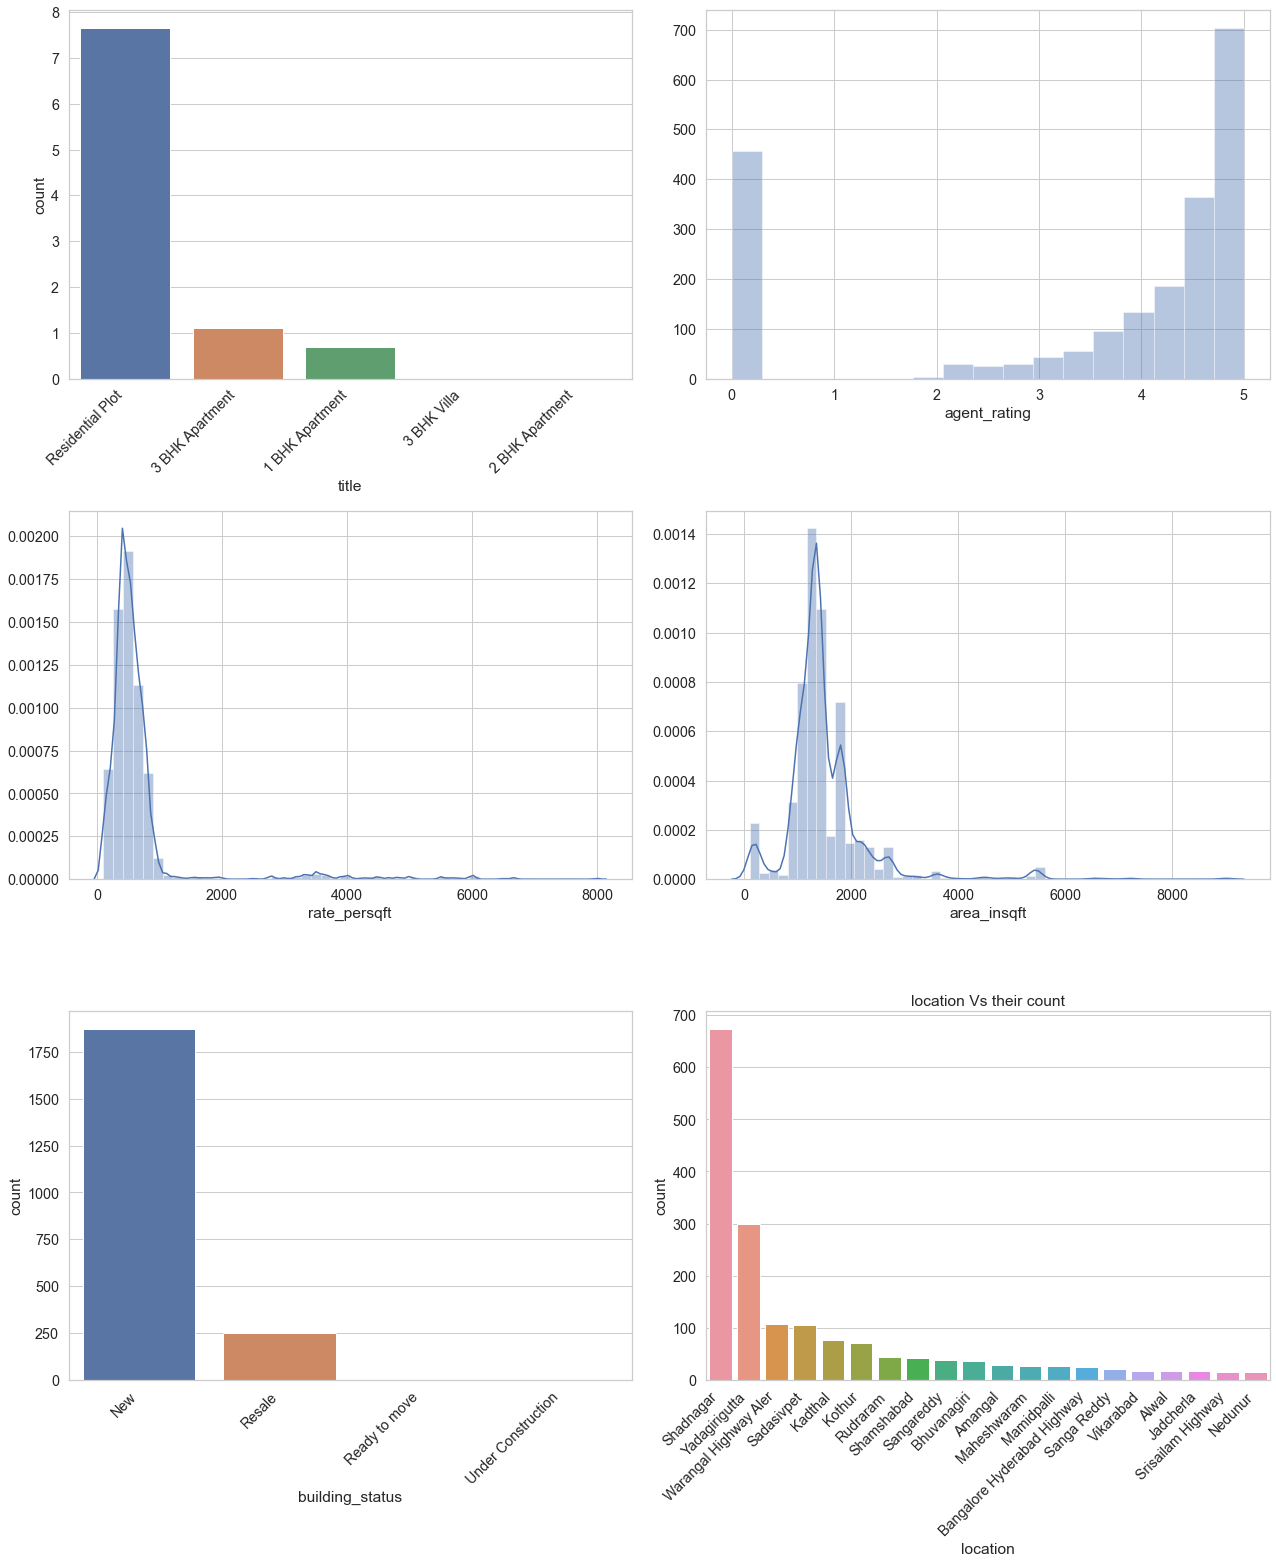

In [245]:
figure, axes = plt.subplots(nrows=3, ncols=2,figsize=(18,22))

temp = d['title'].value_counts().reset_index()
temp.columns = ['title','count']

fig = sns.barplot(x='title', y=np.log(temp['count']), data=temp, ax=axes[0][0])
plt.title('Type of Property Vs log of count')
plt.setp(fig.get_xticklabels(), rotation=45, horizontalalignment='right');

fig = sns.distplot(d['agent_rating'],kde=False, ax=axes[0][1])
plt.title('agent_rating histogram')

fig = sns.distplot(d['rate_persqft'], ax=axes[1][0])
plt.title('rate_persqft histogram')

fig = sns.distplot(d['area_insqft'], ax=axes[1][1])
plt.title('area_insqft histogram')

temp = d['building_status'].value_counts().reset_index()
temp.columns = ['building_status','count']
fig = sns.barplot(x='building_status', y=(temp['count']), data=temp, ax=axes[2][0])
plt.title('building_status Vs their count')
plt.setp(fig.get_xticklabels(), rotation=45, horizontalalignment='right');

temp = d['location'].value_counts().reset_index().head(20)
temp.columns = ['location','count']
fig = sns.barplot(x='location', y=(temp['count']), data=temp, ax=axes[2][1])
plt.title('location Vs their count')
plt.setp(fig.get_xticklabels(), rotation=45, horizontalalignment='right');

plt.tight_layout()

Observations: 
1. within Price range 0.16-10 Lakh, Plots of around 9-10 Lakh Price are highly available.
2. Most of the Plots available are Newly constructed and are Residential Plots.
3. Shadnagar city has the highest number of Plots with average rating of 5.
4. Mean area in square feet is 1000.

## 6.2. Price (Interval 1 = [10.1 to 20.0 L])

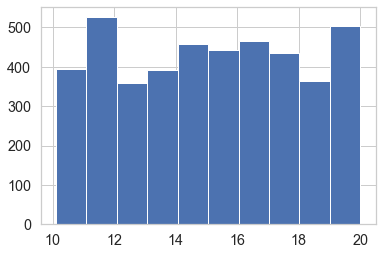

In [246]:
d = df[(df['price(L)']>=10.1) & (df['price(L)']<=20.0)]
plt.hist(d['price(L)']);

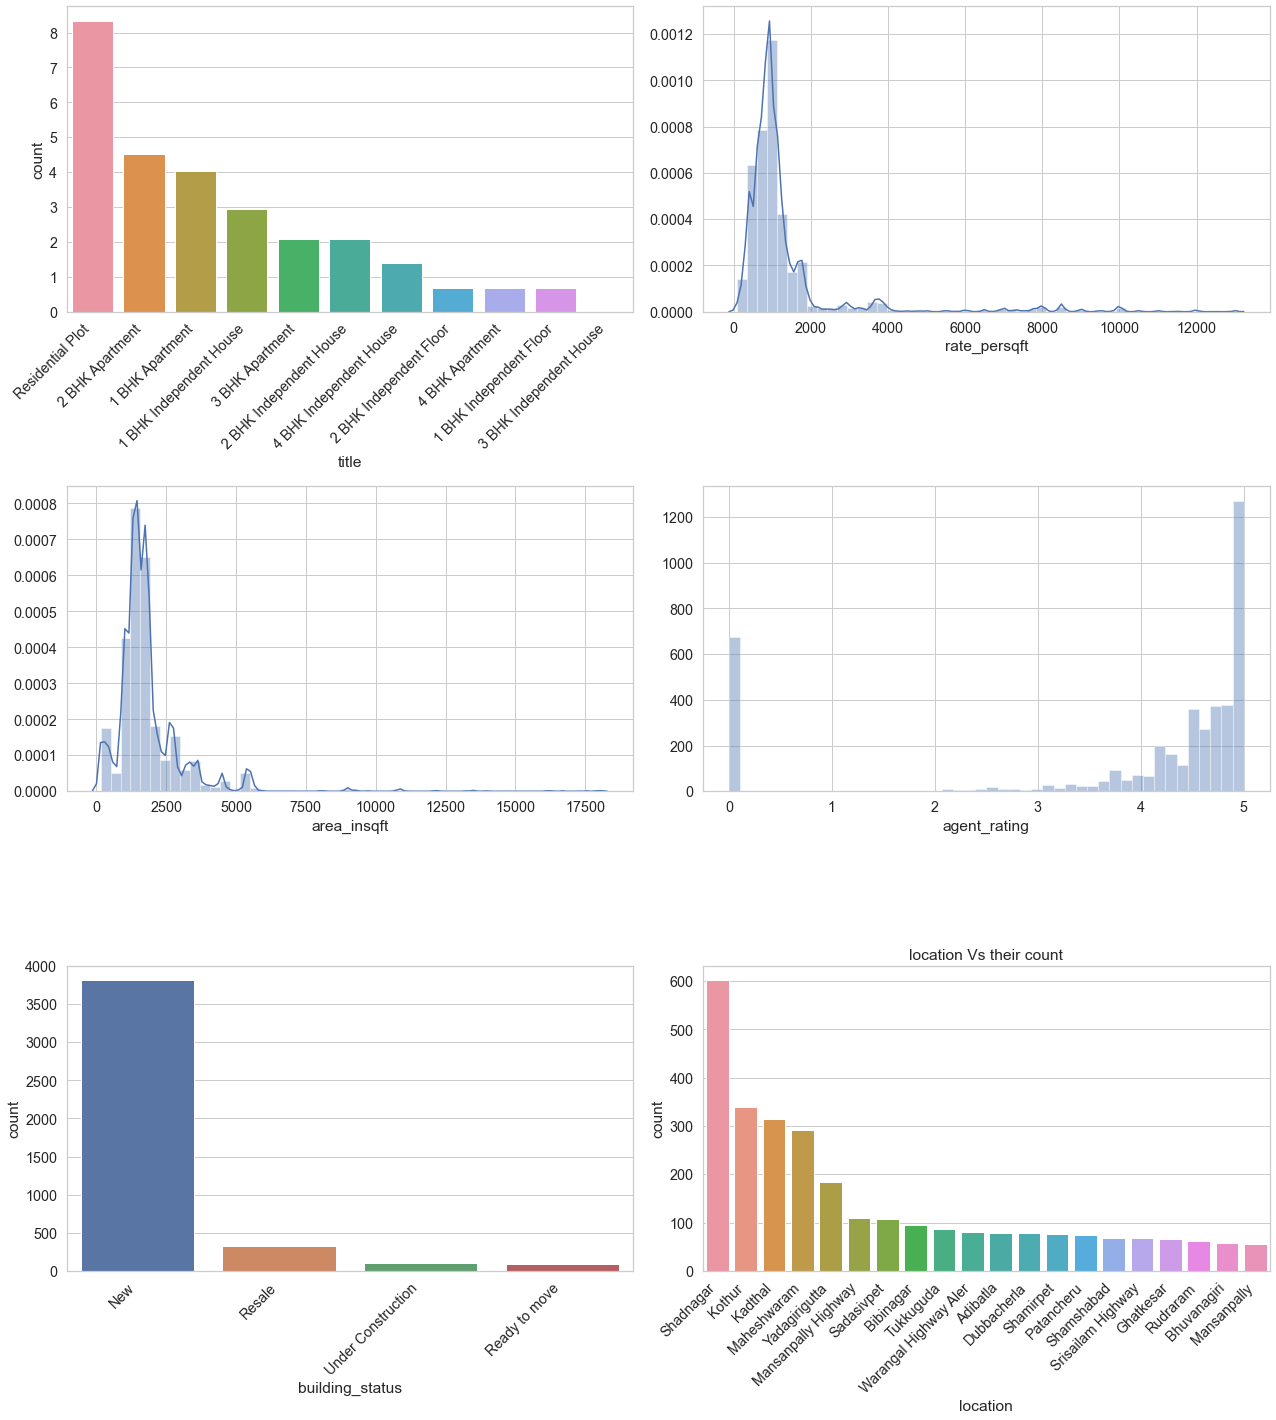

In [247]:
figure, axes = plt.subplots(nrows=3, ncols=2,figsize=(18,20))

temp = d['title'].value_counts().reset_index()
temp.columns = ['title','count']

fig = sns.barplot(x='title', y=np.log(temp['count']), data=temp, ax=axes[0][0])
plt.title('Type of Property Vs log of count')
plt.setp(fig.get_xticklabels(), rotation=45, horizontalalignment='right');


fig = sns.distplot(d['rate_persqft'], ax=axes[0][1])
plt.title('rate_persqft histogram')

fig = sns.distplot(d['area_insqft'], ax=axes[1][0])
plt.title('area_insqft histogram')

fig = sns.distplot(d['agent_rating'],kde=False, ax=axes[1][1])
plt.title('agent_rating histogram')


temp = d['building_status'].value_counts().reset_index()
temp.columns = ['building_status','count']
fig = sns.barplot(x='building_status', y=(temp['count']), data=temp, ax=axes[2][0])
plt.title('building_status Vs their count')
plt.setp(fig.get_xticklabels(), rotation=45, horizontalalignment='right');

temp = d['location'].value_counts().reset_index().head(20)
temp.columns = ['location','count']
fig = sns.barplot(x='location', y=(temp['count']), data=temp, ax=axes[2][1])
plt.title('location Vs their count')
plt.setp(fig.get_xticklabels(), rotation=45, horizontalalignment='right');

plt.tight_layout()

Observations:
1. In interval 10.1 to 20 lakh, property with price 11- 12 lakh are Highly available (around 600 Peoperties).
2. Most of the property available are of Residential Area Type and are newly constructed.
3. Also, the properties within this price range are higly rated with value 5. 
4. the mean rate per square foot is about 1000.
5. mean area in square feet is 1500.


## 6.3. Price (Interval 1 = [20.1 to 30 L])

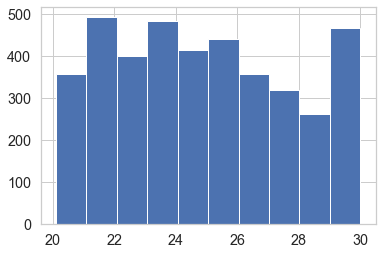

In [248]:
d = df[(df['price(L)']>=20.1) & (df['price(L)']<=30)]
plt.hist(d['price(L)']);

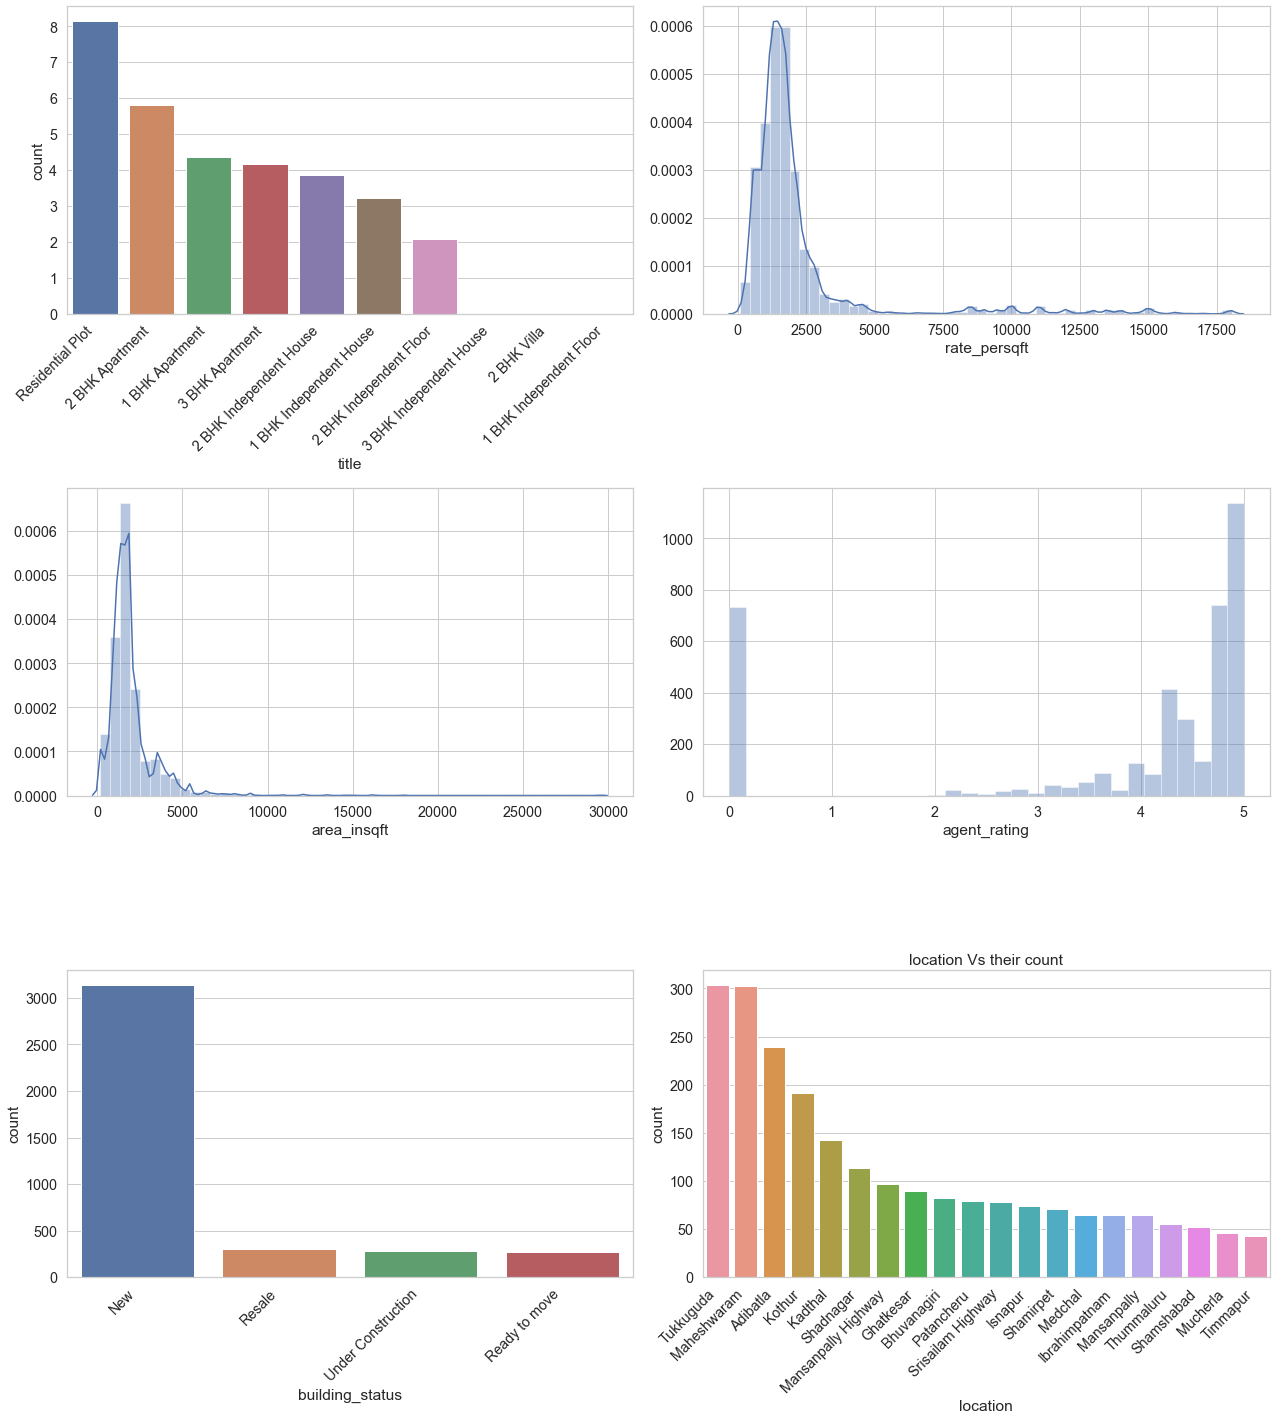

In [249]:
figure, axes = plt.subplots(nrows=3, ncols=2,figsize=(18,20))

temp = d['title'].value_counts().reset_index()
temp.columns = ['title','count']

fig = sns.barplot(x='title', y=np.log(temp['count']), data=temp, ax=axes[0][0])
plt.title('Type of Property Vs log of count')
plt.setp(fig.get_xticklabels(), rotation=45, horizontalalignment='right');


fig = sns.distplot(d['rate_persqft'], ax=axes[0][1])
plt.title('rate_persqft histogram')

fig = sns.distplot(d['area_insqft'], ax=axes[1][0])
plt.title('area_insqft histogram')

fig = sns.distplot(d['agent_rating'],kde=False, ax=axes[1][1])
plt.title('agent_rating histogram')


temp = d['building_status'].value_counts().reset_index()
temp.columns = ['building_status','count']
fig = sns.barplot(x='building_status', y=(temp['count']), data=temp, ax=axes[2][0])
plt.title('building_status Vs their count')
plt.setp(fig.get_xticklabels(), rotation=45, horizontalalignment='right');

temp = d['location'].value_counts().reset_index().head(20)
temp.columns = ['location','count']
fig = sns.barplot(x='location', y=(temp['count']), data=temp, ax=axes[2][1])
plt.title('location Vs their count')
plt.setp(fig.get_xticklabels(), rotation=45, horizontalalignment='right');

plt.tight_layout()

1. In interval 20.1L- 30L Residential Areas and 2BHk apartments are easily available.
2. Tukkuguda, Maheshwaram have highest number of properties within this price range.
3. the Properties are newly constructed in this range.
4. The average rating is 4.8 to 5 with mean rate per sqaure foot of 2000 and area in square feet of around 2500.

## 6.4. Price (Interval 1 = [30 to 40 L])

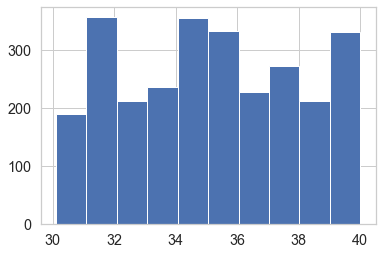

In [250]:
d = df[(df['price(L)']>=30.1) & (df['price(L)']<=40)]
plt.hist(d['price(L)']);

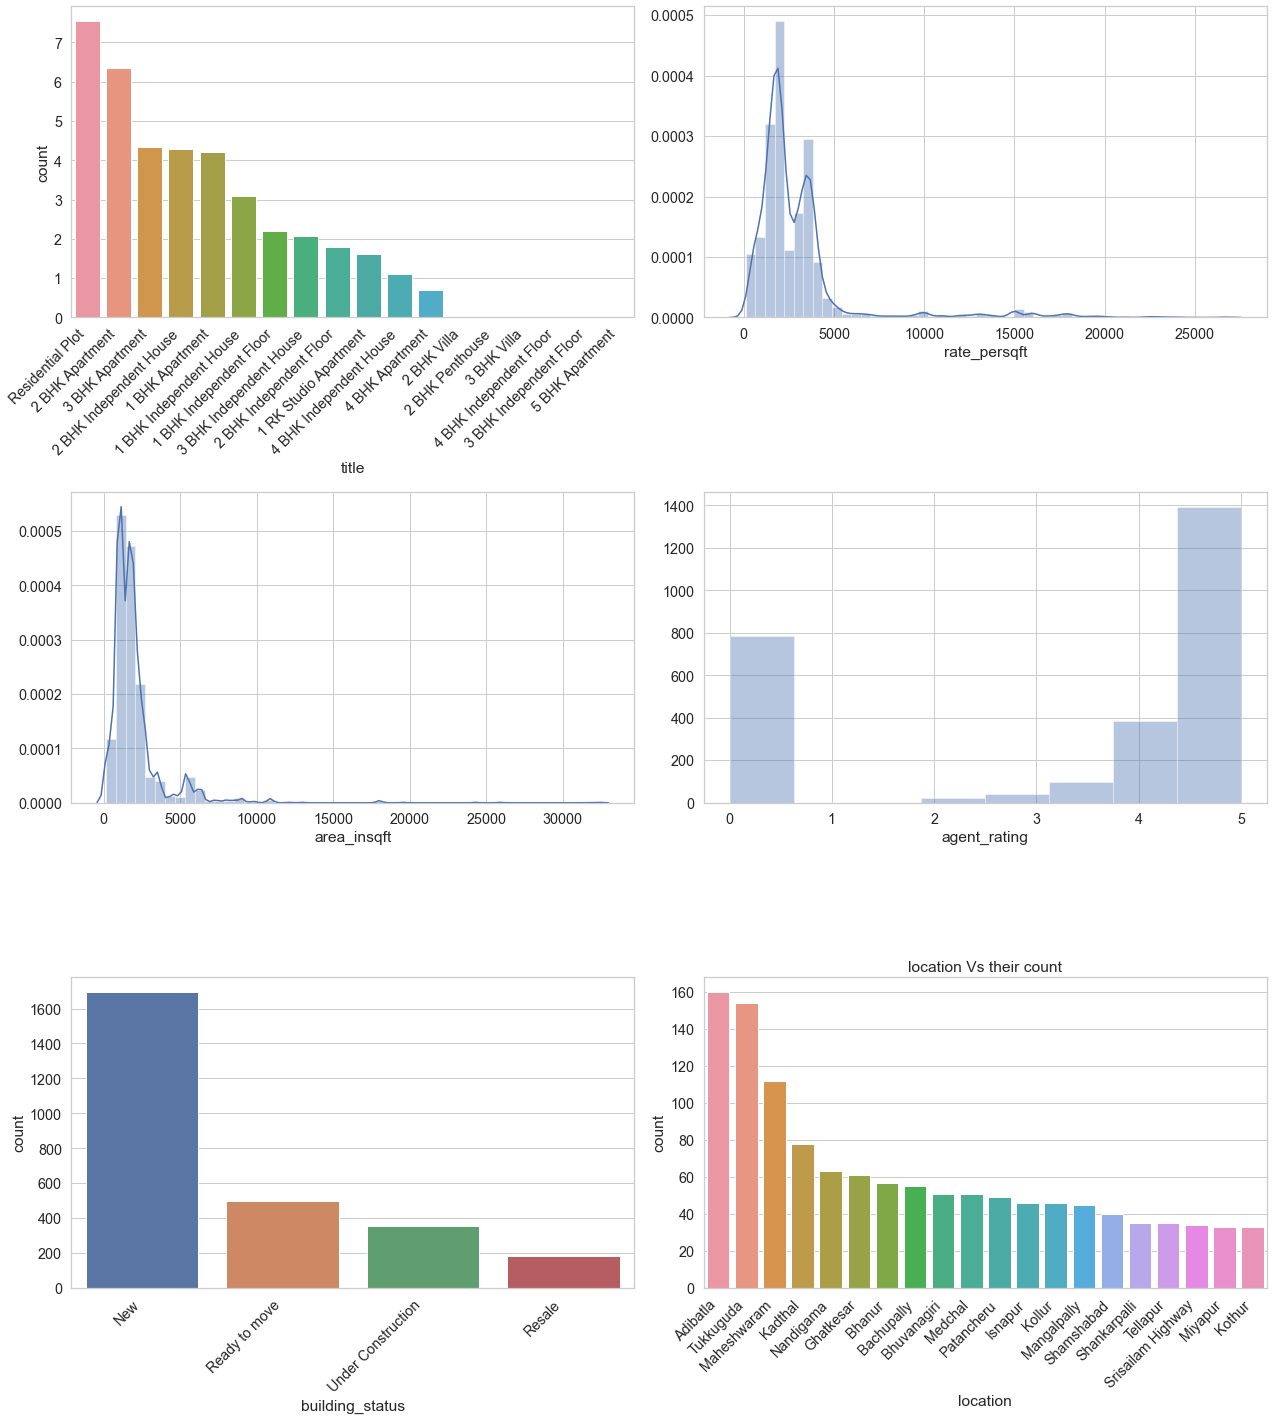

In [251]:
figure, axes = plt.subplots(nrows=3, ncols=2,figsize=(18,20))

temp = d['title'].value_counts().reset_index()
temp.columns = ['title','count']

fig = sns.barplot(x='title', y=np.log(temp['count']), data=temp, ax=axes[0][0])
plt.title('Type of Property Vs log of count')
plt.setp(fig.get_xticklabels(), rotation=45, horizontalalignment='right');


fig = sns.distplot(d['rate_persqft'], ax=axes[0][1])
plt.title('rate_persqft histogram')

fig = sns.distplot(d['area_insqft'], ax=axes[1][0])
plt.title('area_insqft histogram')

fig = sns.distplot(d['agent_rating'],kde=False, ax=axes[1][1])
plt.title('agent_rating histogram')


temp = d['building_status'].value_counts().reset_index()
temp.columns = ['building_status','count']
fig = sns.barplot(x='building_status', y=(temp['count']), data=temp, ax=axes[2][0])
plt.title('building_status Vs their count')
plt.setp(fig.get_xticklabels(), rotation=45, horizontalalignment='right');

temp = d['location'].value_counts().reset_index().head(20)
temp.columns = ['location','count']
fig = sns.barplot(x='location', y=(temp['count']), data=temp, ax=axes[2][1])
plt.title('location Vs their count')
plt.setp(fig.get_xticklabels(), rotation=45, horizontalalignment='right');
plt.tight_layout()


1. In interval 30.1L- 40L Residential Areas and 2BHk apartments and Independent homes are easily available.
2. Adibatla, and Tukkuguda have highest number of properties within this price range.
3. the Properties are newly constructed in this range.
4. The average rating is 4.8 to 5 with mean rate per sqaure foot of 2000 and area in square feet of around 2500.

## 6.5. Price (Interval 1 = [40 to 50 L])

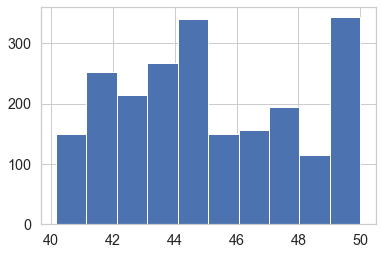

In [252]:
d = df[(df['price(L)']>=40.1) & (df['price(L)']<=50)]
plt.hist(d['price(L)']);

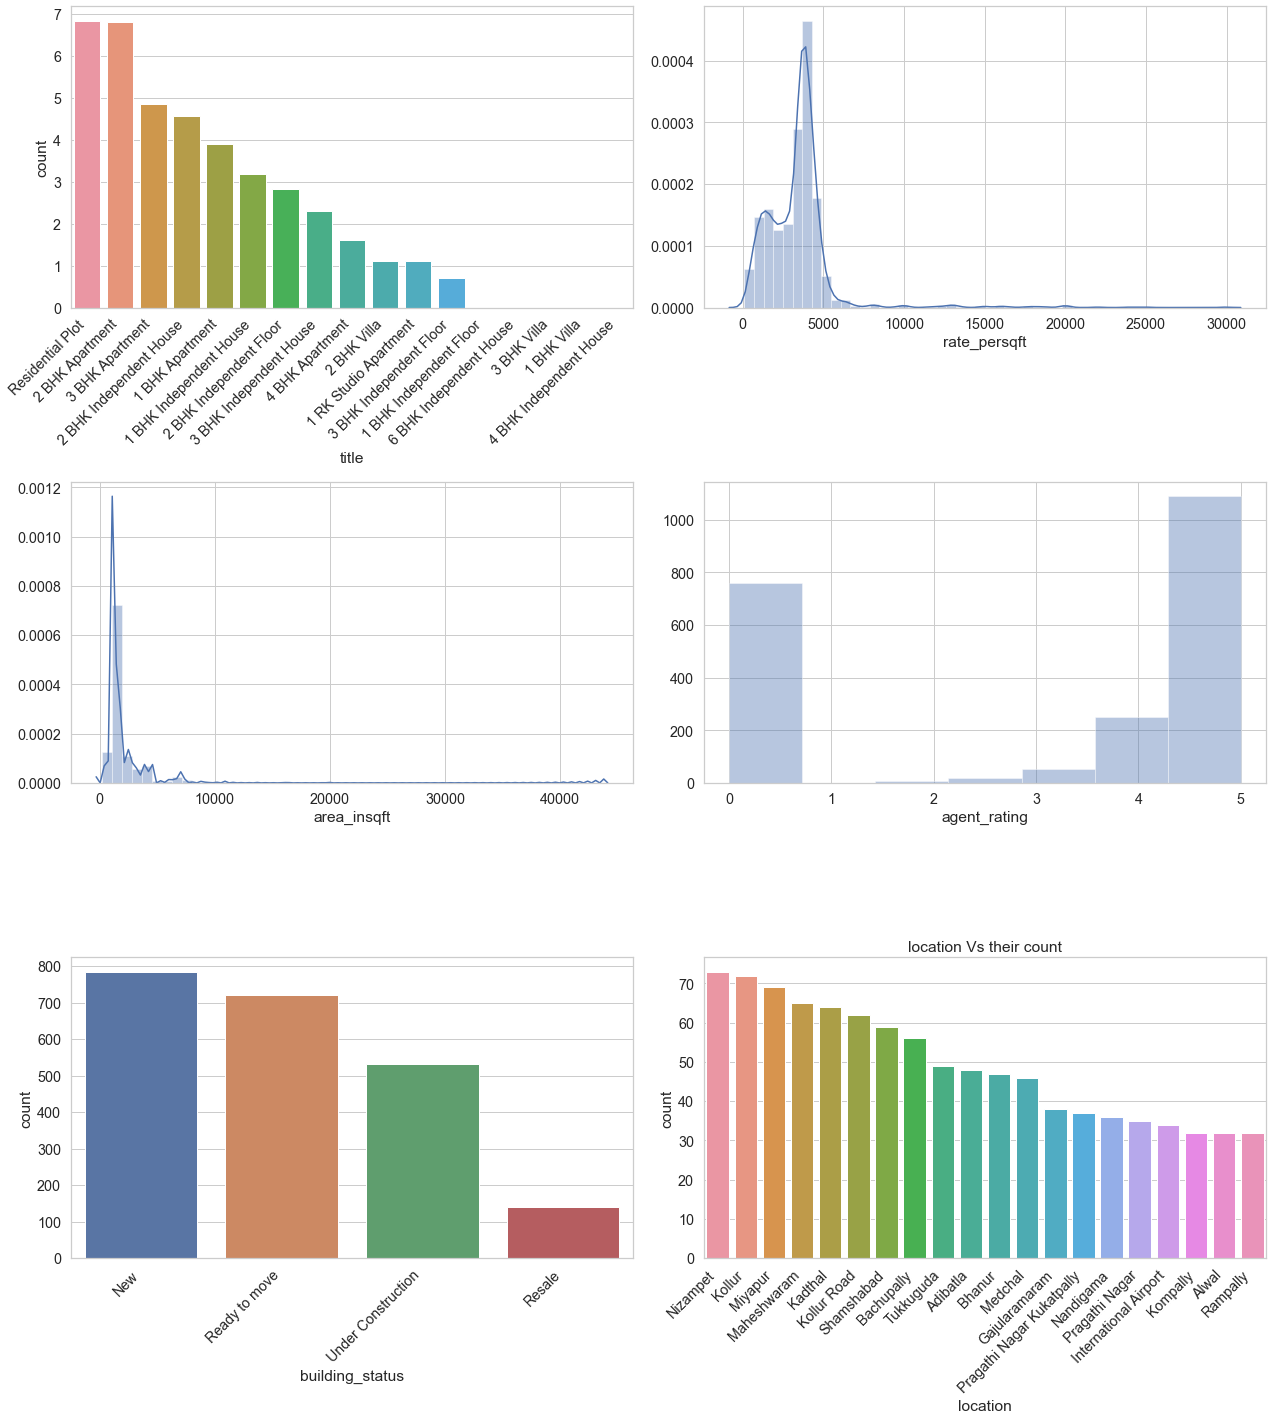

In [253]:
figure, axes = plt.subplots(nrows=3, ncols=2,figsize=(18,20))

temp = d['title'].value_counts().reset_index()
temp.columns = ['title','count']

fig = sns.barplot(x='title', y=np.log(temp['count']), data=temp, ax=axes[0][0])
plt.title('Type of Property Vs log of count')
plt.setp(fig.get_xticklabels(), rotation=45, horizontalalignment='right');


fig = sns.distplot(d['rate_persqft'], ax=axes[0][1])
plt.title('rate_persqft histogram')

fig = sns.distplot(d['area_insqft'], ax=axes[1][0])
plt.title('area_insqft histogram')

fig = sns.distplot(d['agent_rating'],kde=False, ax=axes[1][1])
plt.title('agent_rating histogram')


temp = d['building_status'].value_counts().reset_index()
temp.columns = ['building_status','count']
fig = sns.barplot(x='building_status', y=(temp['count']), data=temp, ax=axes[2][0])
plt.title('building_status Vs their count')
plt.setp(fig.get_xticklabels(), rotation=45, horizontalalignment='right');

temp = d['location'].value_counts().reset_index().head(20)
temp.columns = ['location','count']
fig = sns.barplot(x='location', y=(temp['count']), data=temp, ax=axes[2][1])
plt.title('location Vs their count')
plt.setp(fig.get_xticklabels(), rotation=45, horizontalalignment='right');
plt.tight_layout()


## 6.6. Price (Interval 1 = [50 to 60 L])

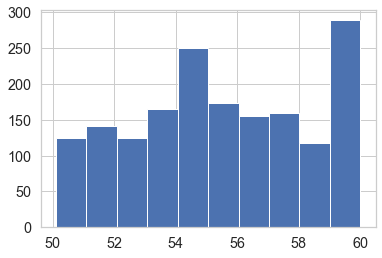

In [254]:
d = df[(df['price(L)']>=50.1) & (df['price(L)']<=60)]
plt.hist(d['price(L)']);

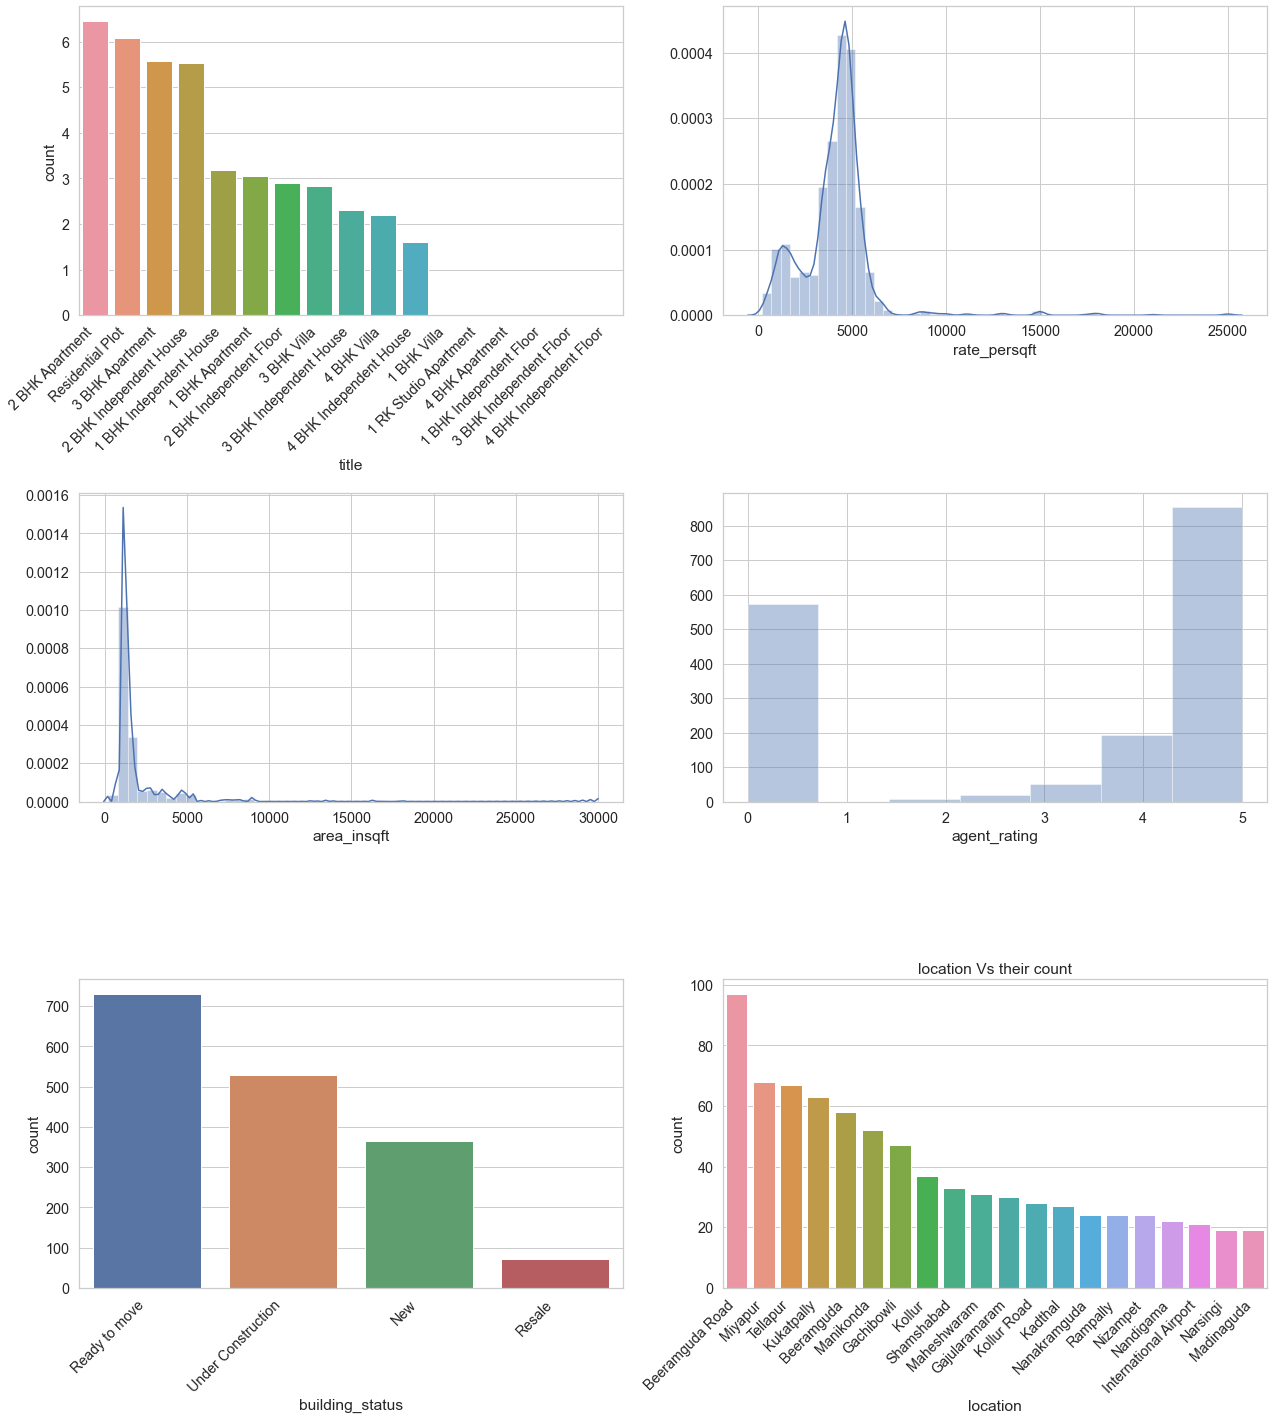

In [255]:
figure, axes = plt.subplots(nrows=3, ncols=2,figsize=(18,20))

temp = d['title'].value_counts().reset_index()
temp.columns = ['title','count']

fig = sns.barplot(x='title', y=np.log(temp['count']), data=temp, ax=axes[0][0])
plt.title('Type of Property Vs their count')
plt.setp(fig.get_xticklabels(), rotation=45, horizontalalignment='right');


fig = sns.distplot(d['rate_persqft'], ax=axes[0][1])
plt.title('rate_persqft histogram')

fig = sns.distplot(d['area_insqft'], ax=axes[1][0])
plt.title('area_insqft histogram')

fig = sns.distplot(d['agent_rating'],kde=False, ax=axes[1][1])
plt.title('agent_rating histogram')


temp = d['building_status'].value_counts().reset_index()
temp.columns = ['building_status','count']
fig = sns.barplot(x='building_status', y=(temp['count']), data=temp, ax=axes[2][0])
plt.title('building_status Vs their count')
plt.setp(fig.get_xticklabels(), rotation=45, horizontalalignment='right');

temp = d['location'].value_counts().reset_index().head(20)
temp.columns = ['location','count']
fig = sns.barplot(x='location', y=(temp['count']), data=temp, ax=axes[2][1])
plt.title('location Vs their count')
plt.setp(fig.get_xticklabels(), rotation=45, horizontalalignment='right');

plt.tight_layout()

## 6.7. Price (Interval 1 = [60 to 70 L])

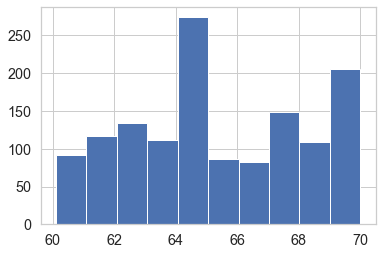

In [256]:
d = df[(df['price(L)']>=60.1) & (df['price(L)']<=70)]
plt.hist(d['price(L)']);

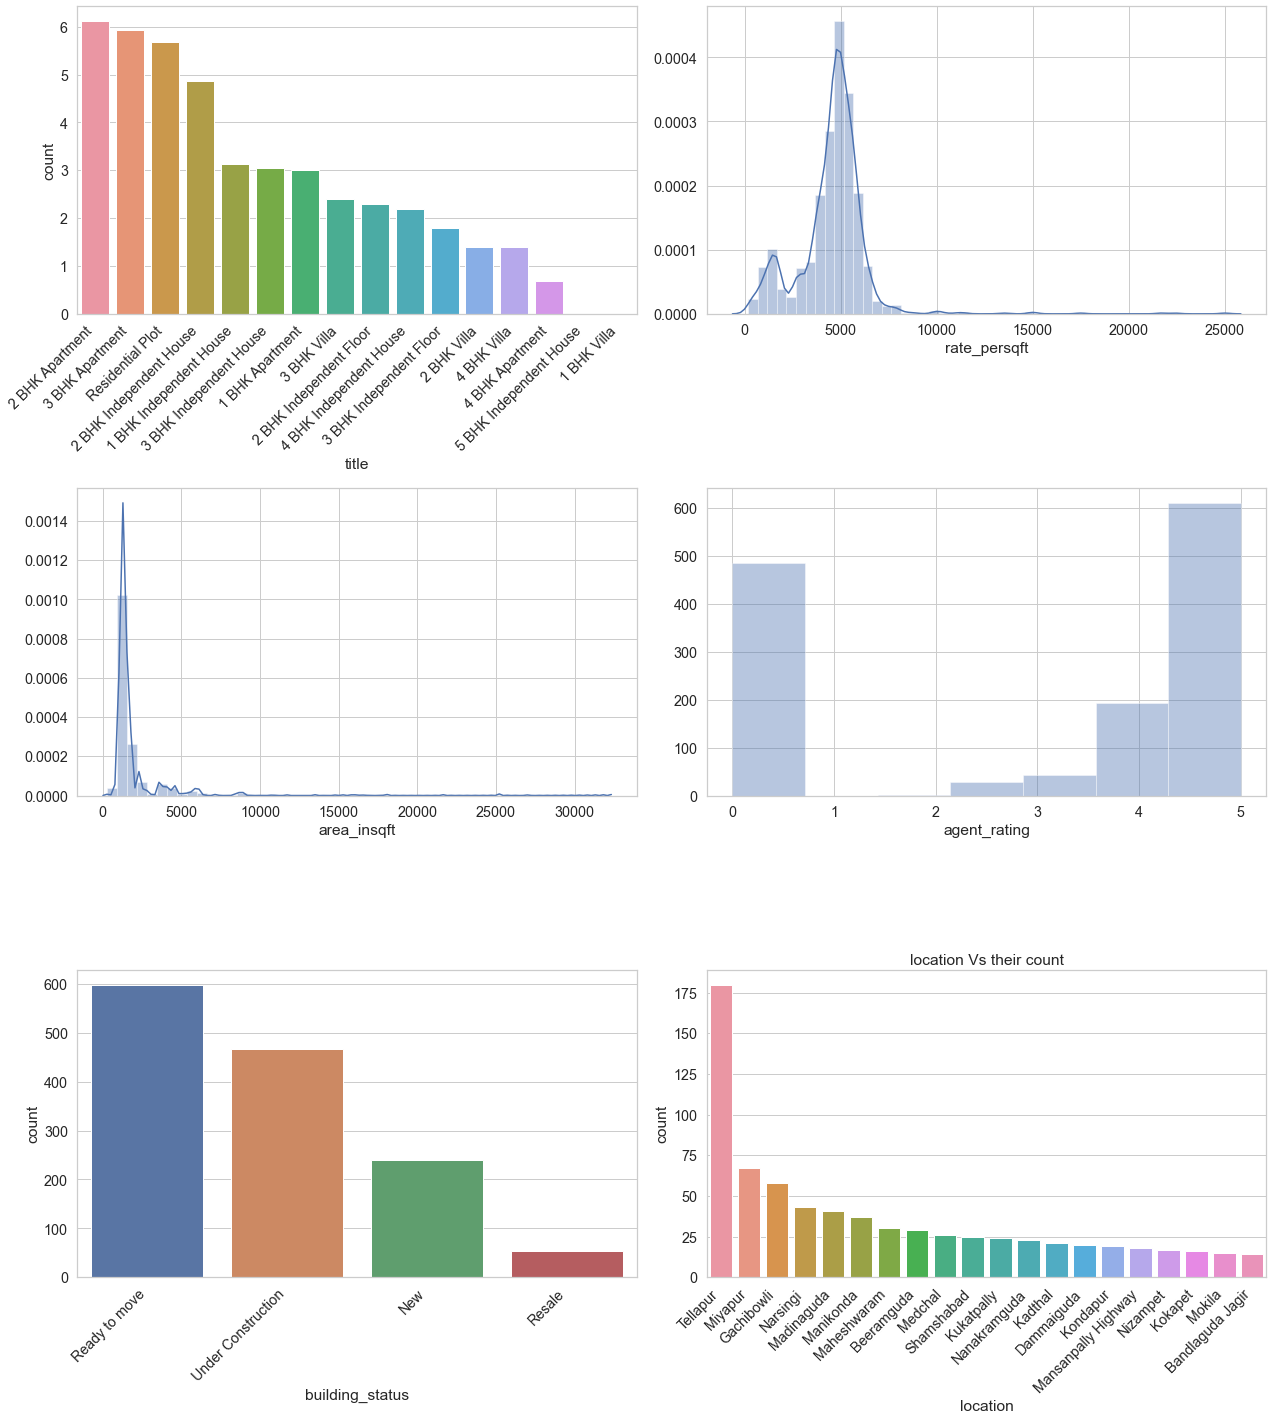

In [257]:
figure, axes = plt.subplots(nrows=3, ncols=2,figsize=(18,20))

temp = d['title'].value_counts().reset_index()
temp.columns = ['title','count']

fig = sns.barplot(x='title', y=np.log(temp['count']), data=temp, ax=axes[0][0])
plt.title('Type of Property Vs log of count')
plt.setp(fig.get_xticklabels(), rotation=45, horizontalalignment='right');


fig = sns.distplot(d['rate_persqft'], ax=axes[0][1])
plt.title('rate_persqft histogram')

fig = sns.distplot(d['area_insqft'], ax=axes[1][0])
plt.title('area_insqft histogram')

fig = sns.distplot(d['agent_rating'],kde=False, ax=axes[1][1])
plt.title('agent_rating histogram')


temp = d['building_status'].value_counts().reset_index()
temp.columns = ['building_status','count']
fig = sns.barplot(x='building_status', y=(temp['count']), data=temp, ax=axes[2][0])
plt.title('building_status Vs their count')
plt.setp(fig.get_xticklabels(), rotation=45, horizontalalignment='right');

temp = d['location'].value_counts().reset_index().head(20)
temp.columns = ['location','count']
fig = sns.barplot(x='location', y=(temp['count']), data=temp, ax=axes[2][1])
plt.title('location Vs their count')
plt.setp(fig.get_xticklabels(), rotation=45, horizontalalignment='right');

plt.tight_layout()

1. Tellapur has highest number of properties within this price range.
2. properties in this range are Ready to move or under construction.
3. 2BHK,3BHK Apartments and residential Plots are higher in this price range but rate persquare foot is almost 5000 in this range

## 6.8. Price (Interval 1 = [70 to 80 L])

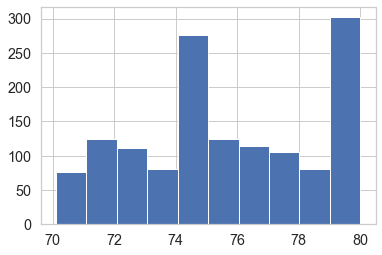

In [258]:
d = df[(df['price(L)']>=70.1) & (df['price(L)']<=80)]
plt.hist(d['price(L)']);

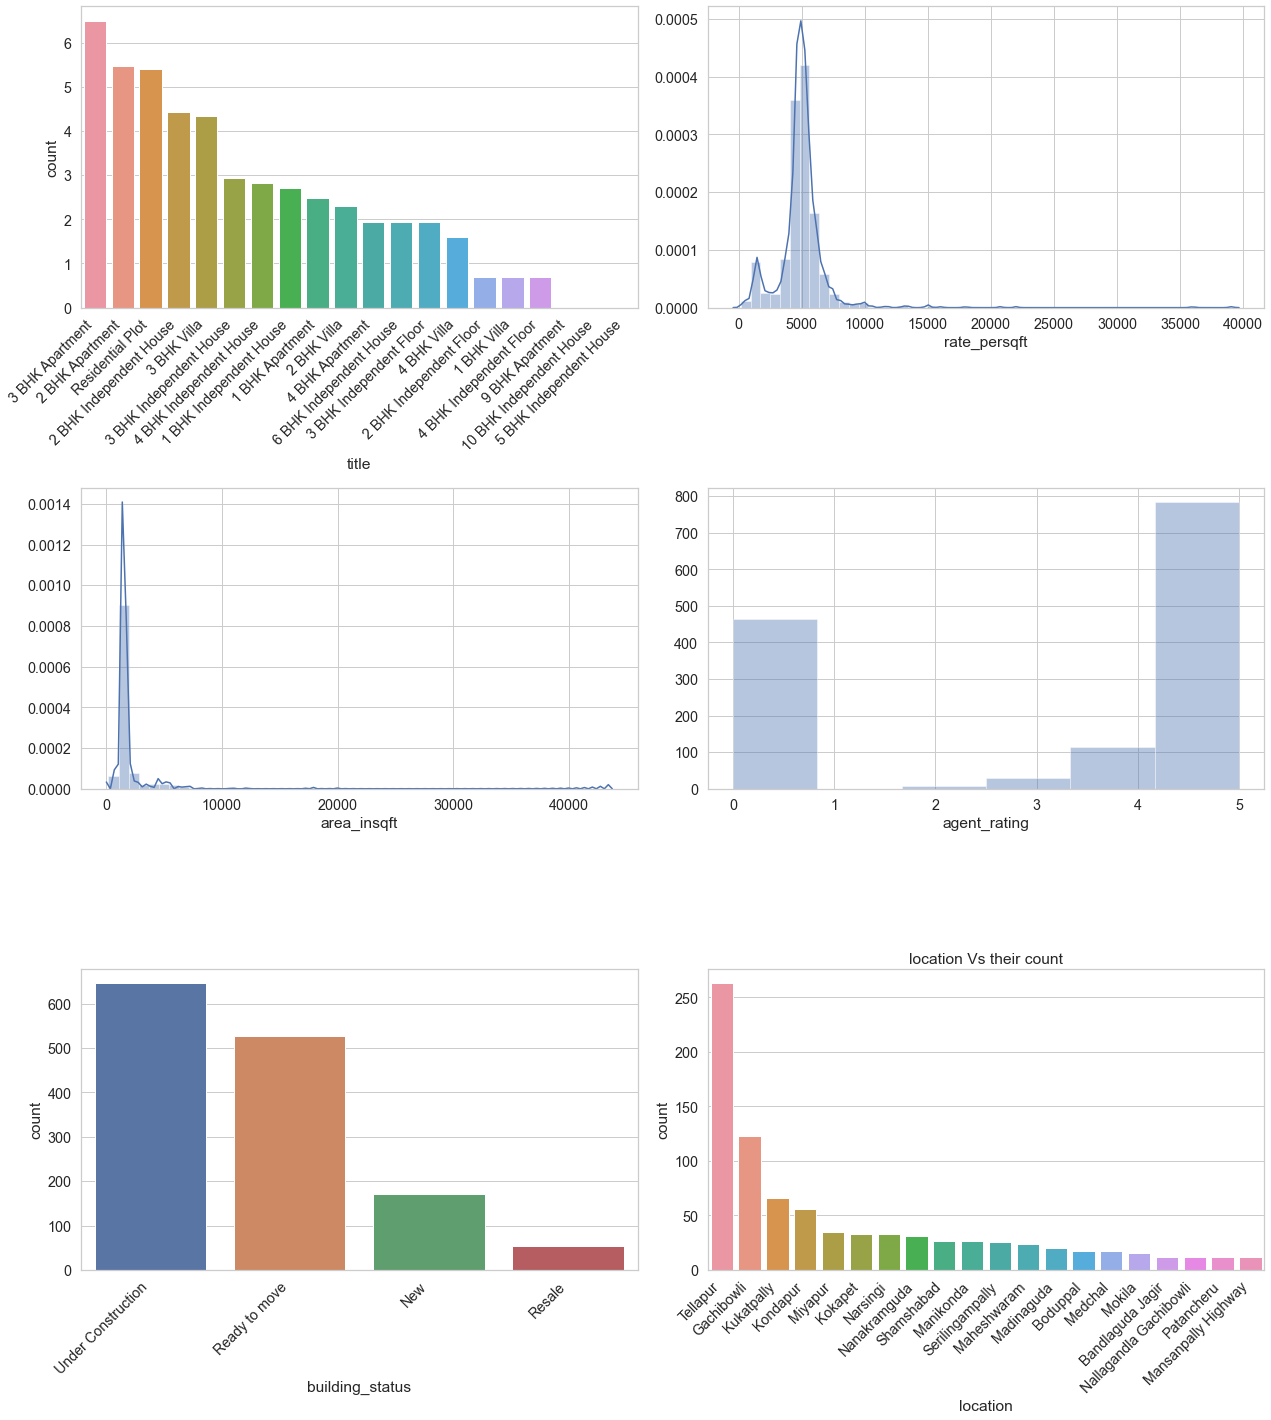

In [259]:
figure, axes = plt.subplots(nrows=3, ncols=2,figsize=(18,20))

temp = d['title'].value_counts().reset_index()
temp.columns = ['title','count']

fig = sns.barplot(x='title', y=np.log(temp['count']), data=temp, ax=axes[0][0])
plt.title('Type of Property Vs log of count')
plt.setp(fig.get_xticklabels(), rotation=45, horizontalalignment='right');


fig = sns.distplot(d['rate_persqft'], ax=axes[0][1])
plt.title('rate_persqft histogram')

fig = sns.distplot(d['area_insqft'], ax=axes[1][0])
plt.title('area_insqft histogram')

fig = sns.distplot(d['agent_rating'],kde=False, ax=axes[1][1])
plt.title('agent_rating histogram')


temp = d['building_status'].value_counts().reset_index()
temp.columns = ['building_status','count']
fig = sns.barplot(x='building_status', y=(temp['count']), data=temp, ax=axes[2][0])
plt.title('building_status Vs their count')
plt.setp(fig.get_xticklabels(), rotation=45, horizontalalignment='right');

temp = d['location'].value_counts().reset_index().head(20)
temp.columns = ['location','count']
fig = sns.barplot(x='location', y=(temp['count']), data=temp, ax=axes[2][1])
plt.title('location Vs their count')
plt.setp(fig.get_xticklabels(), rotation=45, horizontalalignment='right');

plt.tight_layout()

## 6.9. Price (Interval 1 = [80.1 to 90 L])

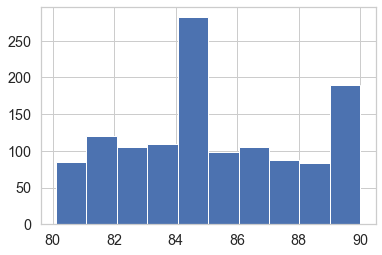

In [260]:
d = df[(df['price(L)']>=80.1) & (df['price(L)']<=90)]
plt.hist(d['price(L)']);

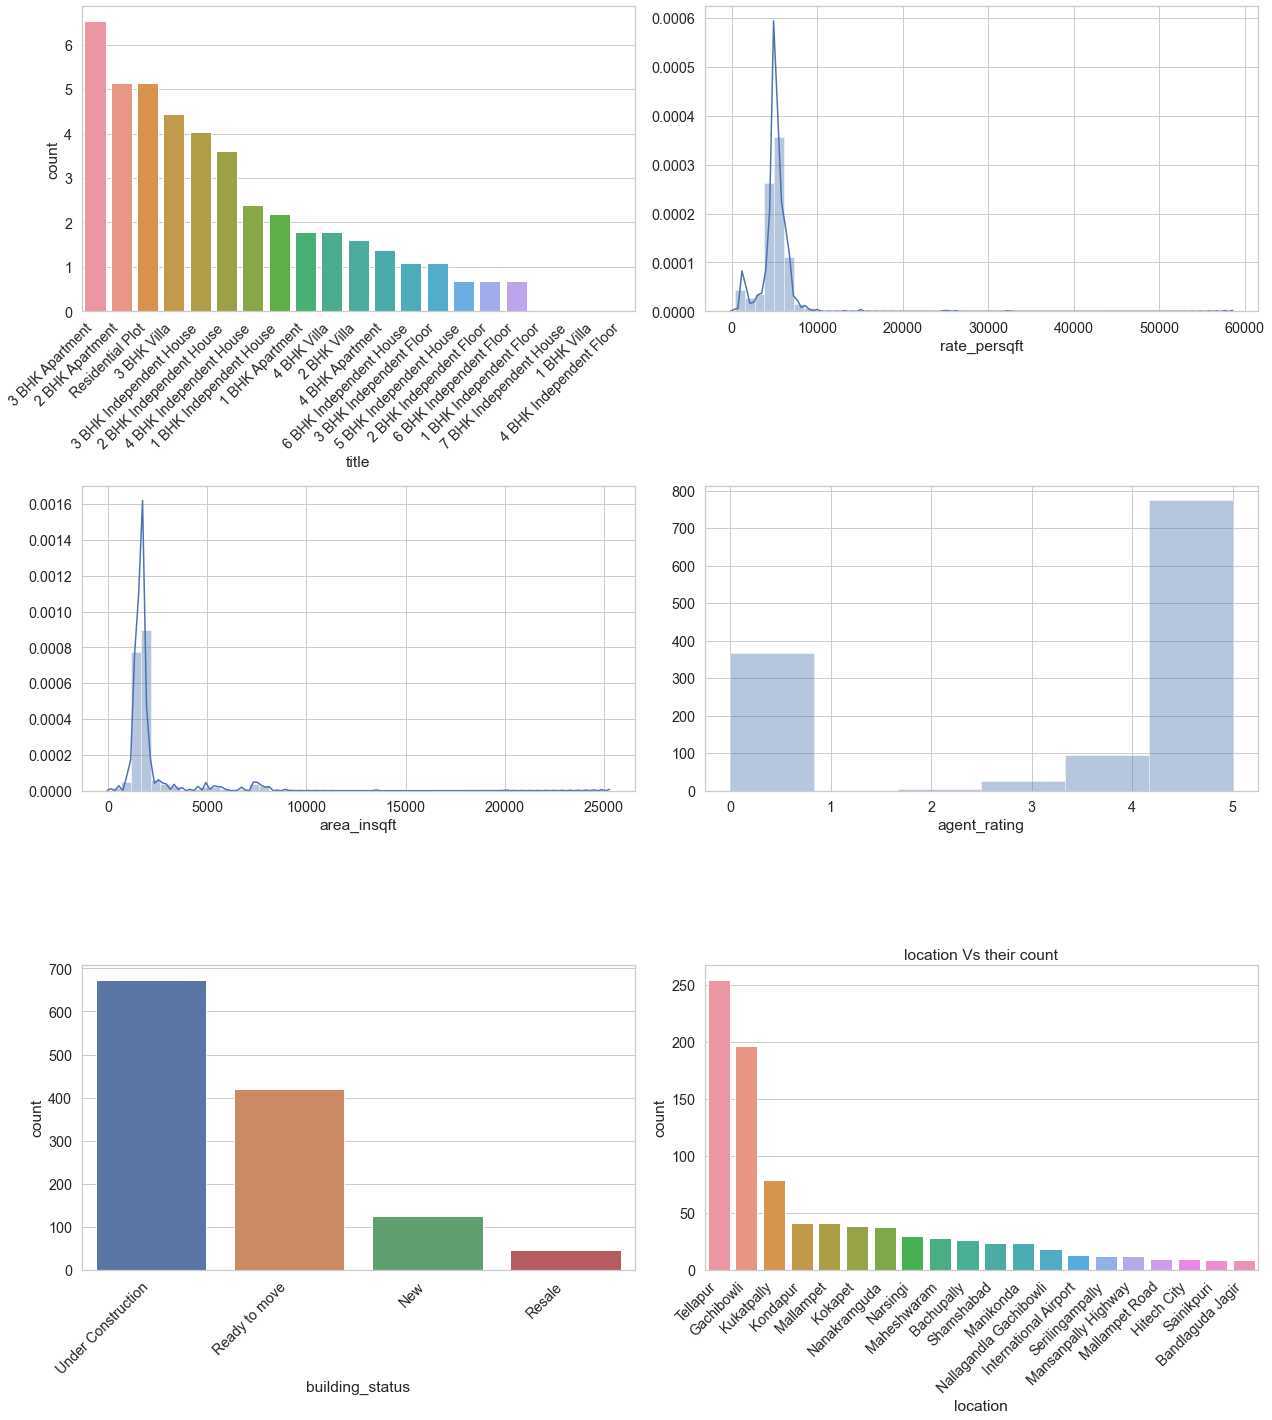

In [261]:
figure, axes = plt.subplots(nrows=3, ncols=2,figsize=(18,20))

temp = d['title'].value_counts().reset_index()
temp.columns = ['title','count']

fig = sns.barplot(x='title', y=np.log(temp['count']), data=temp, ax=axes[0][0])
plt.title('Type of Property Vs log of count')
plt.setp(fig.get_xticklabels(), rotation=45, horizontalalignment='right');


fig = sns.distplot(d['rate_persqft'], ax=axes[0][1])
plt.title('rate_persqft histogram')

fig = sns.distplot(d['area_insqft'], ax=axes[1][0])
plt.title('area_insqft histogram')

fig = sns.distplot(d['agent_rating'],kde=False, ax=axes[1][1])
plt.title('agent_rating histogram')


temp = d['building_status'].value_counts().reset_index()
temp.columns = ['building_status','count']
fig = sns.barplot(x='building_status', y=(temp['count']), data=temp, ax=axes[2][0])
plt.title('building_status Vs their count')
plt.setp(fig.get_xticklabels(), rotation=45, horizontalalignment='right');

temp = d['location'].value_counts().reset_index().head(20)
temp.columns = ['location','count']
fig = sns.barplot(x='location', y=(temp['count']), data=temp, ax=axes[2][1])
plt.title('location Vs their count')
plt.setp(fig.get_xticklabels(), rotation=45, horizontalalignment='right');

plt.tight_layout()

## 6.10. Price (Interval 1 = [90 to 100 L])

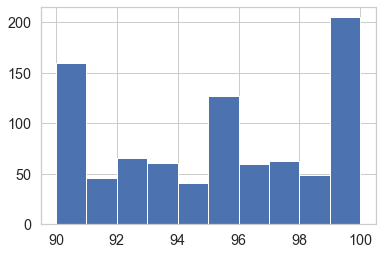

In [262]:
d = df[(df['price(L)']>=90) & (df['price(L)']<=100)]
plt.hist(d['price(L)']);

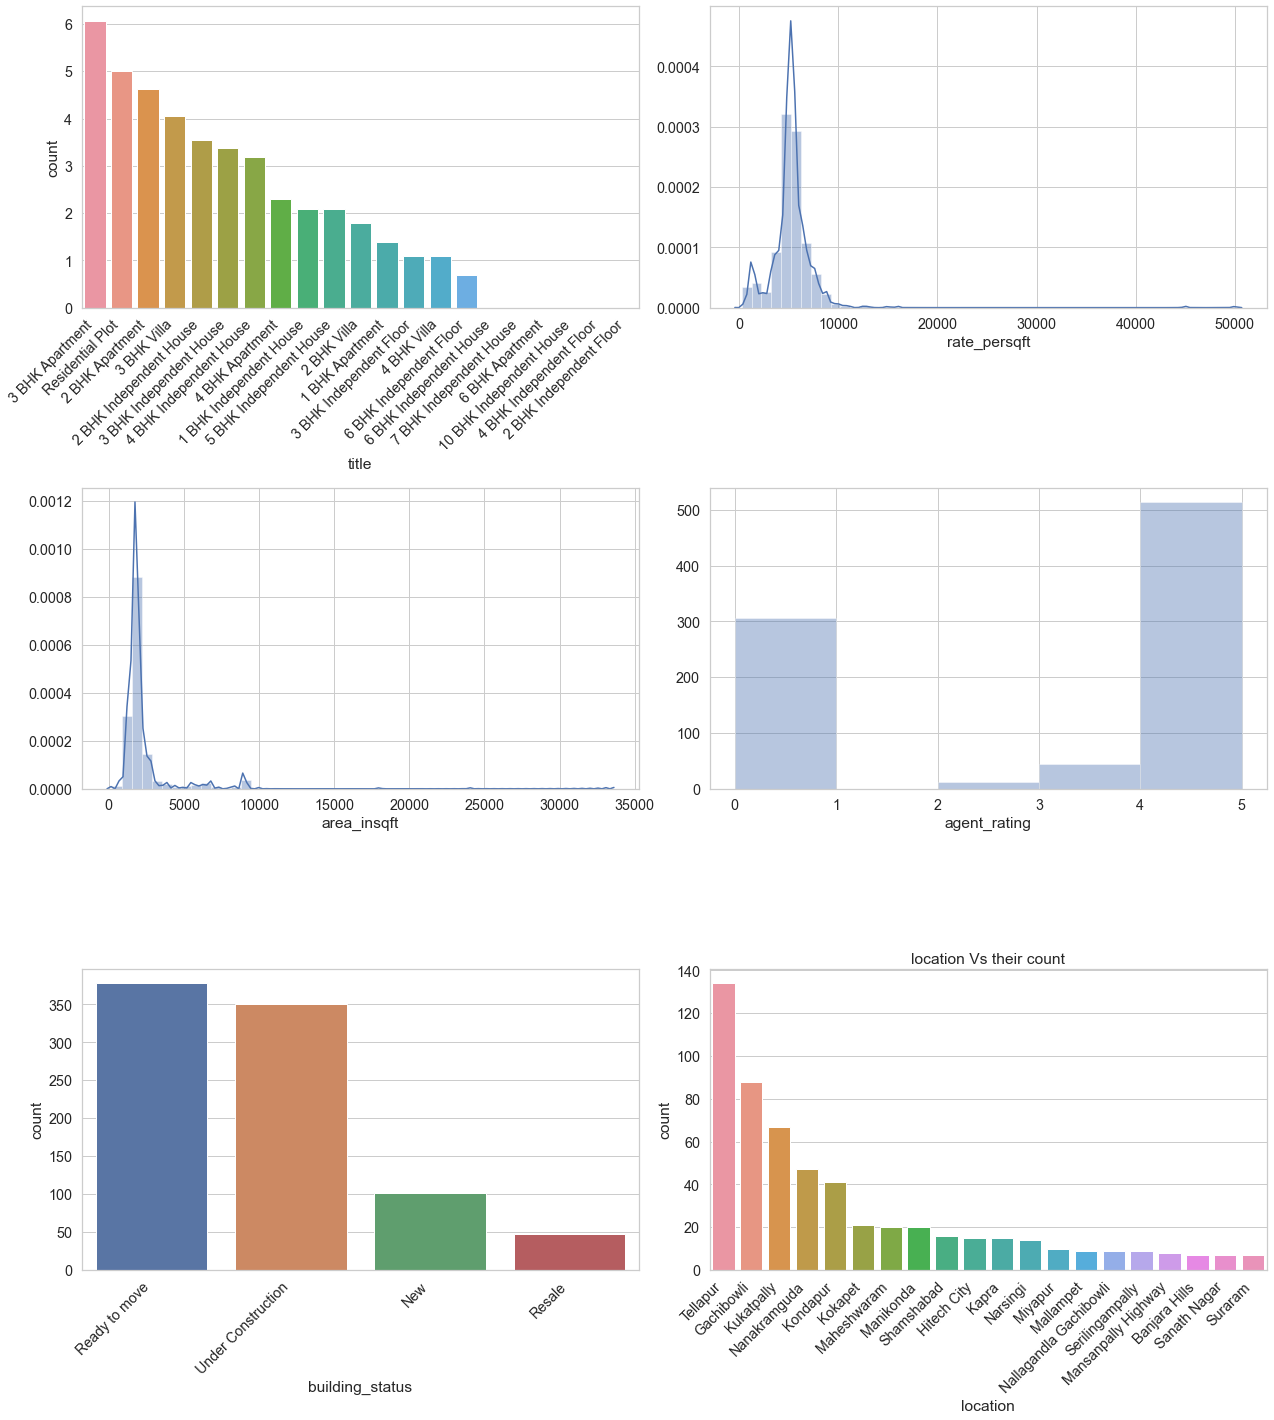

In [263]:
figure, axes = plt.subplots(nrows=3, ncols=2,figsize=(18,20))

temp = d['title'].value_counts().reset_index()
temp.columns = ['title','count']

fig = sns.barplot(x='title', y=np.log(temp['count']), data=temp, ax=axes[0][0])
plt.title('Type of Property Vs log of count')
plt.setp(fig.get_xticklabels(), rotation=45, horizontalalignment='right');


fig = sns.distplot(d['rate_persqft'], ax=axes[0][1])
plt.title('rate_persqft histogram')

fig = sns.distplot(d['area_insqft'], ax=axes[1][0])
plt.title('area_insqft histogram')

fig = sns.distplot(d['agent_rating'],kde=False, ax=axes[1][1])
plt.title('agent_rating histogram')


temp = d['building_status'].value_counts().reset_index()
temp.columns = ['building_status','count']
fig = sns.barplot(x='building_status', y=(temp['count']), data=temp, ax=axes[2][0])
plt.title('building_status Vs their count')
plt.setp(fig.get_xticklabels(), rotation=45, horizontalalignment='right');

temp = d['location'].value_counts().reset_index().head(20)
temp.columns = ['location','count']
fig = sns.barplot(x='location', y=(temp['count']), data=temp, ax=axes[2][1])
plt.title('location Vs their count')
plt.setp(fig.get_xticklabels(), rotation=45, horizontalalignment='right');

plt.tight_layout()

## 6.11. Price (Interval 1 = [100 to 7000 L])

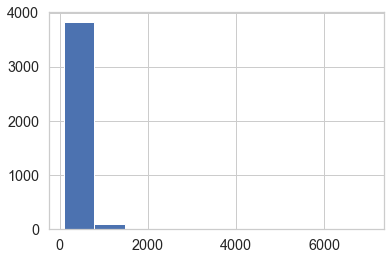

In [264]:
d = df[(df['price(L)']>=100) & (df['price(L)']<=7000)]
plt.hist(d['price(L)']);

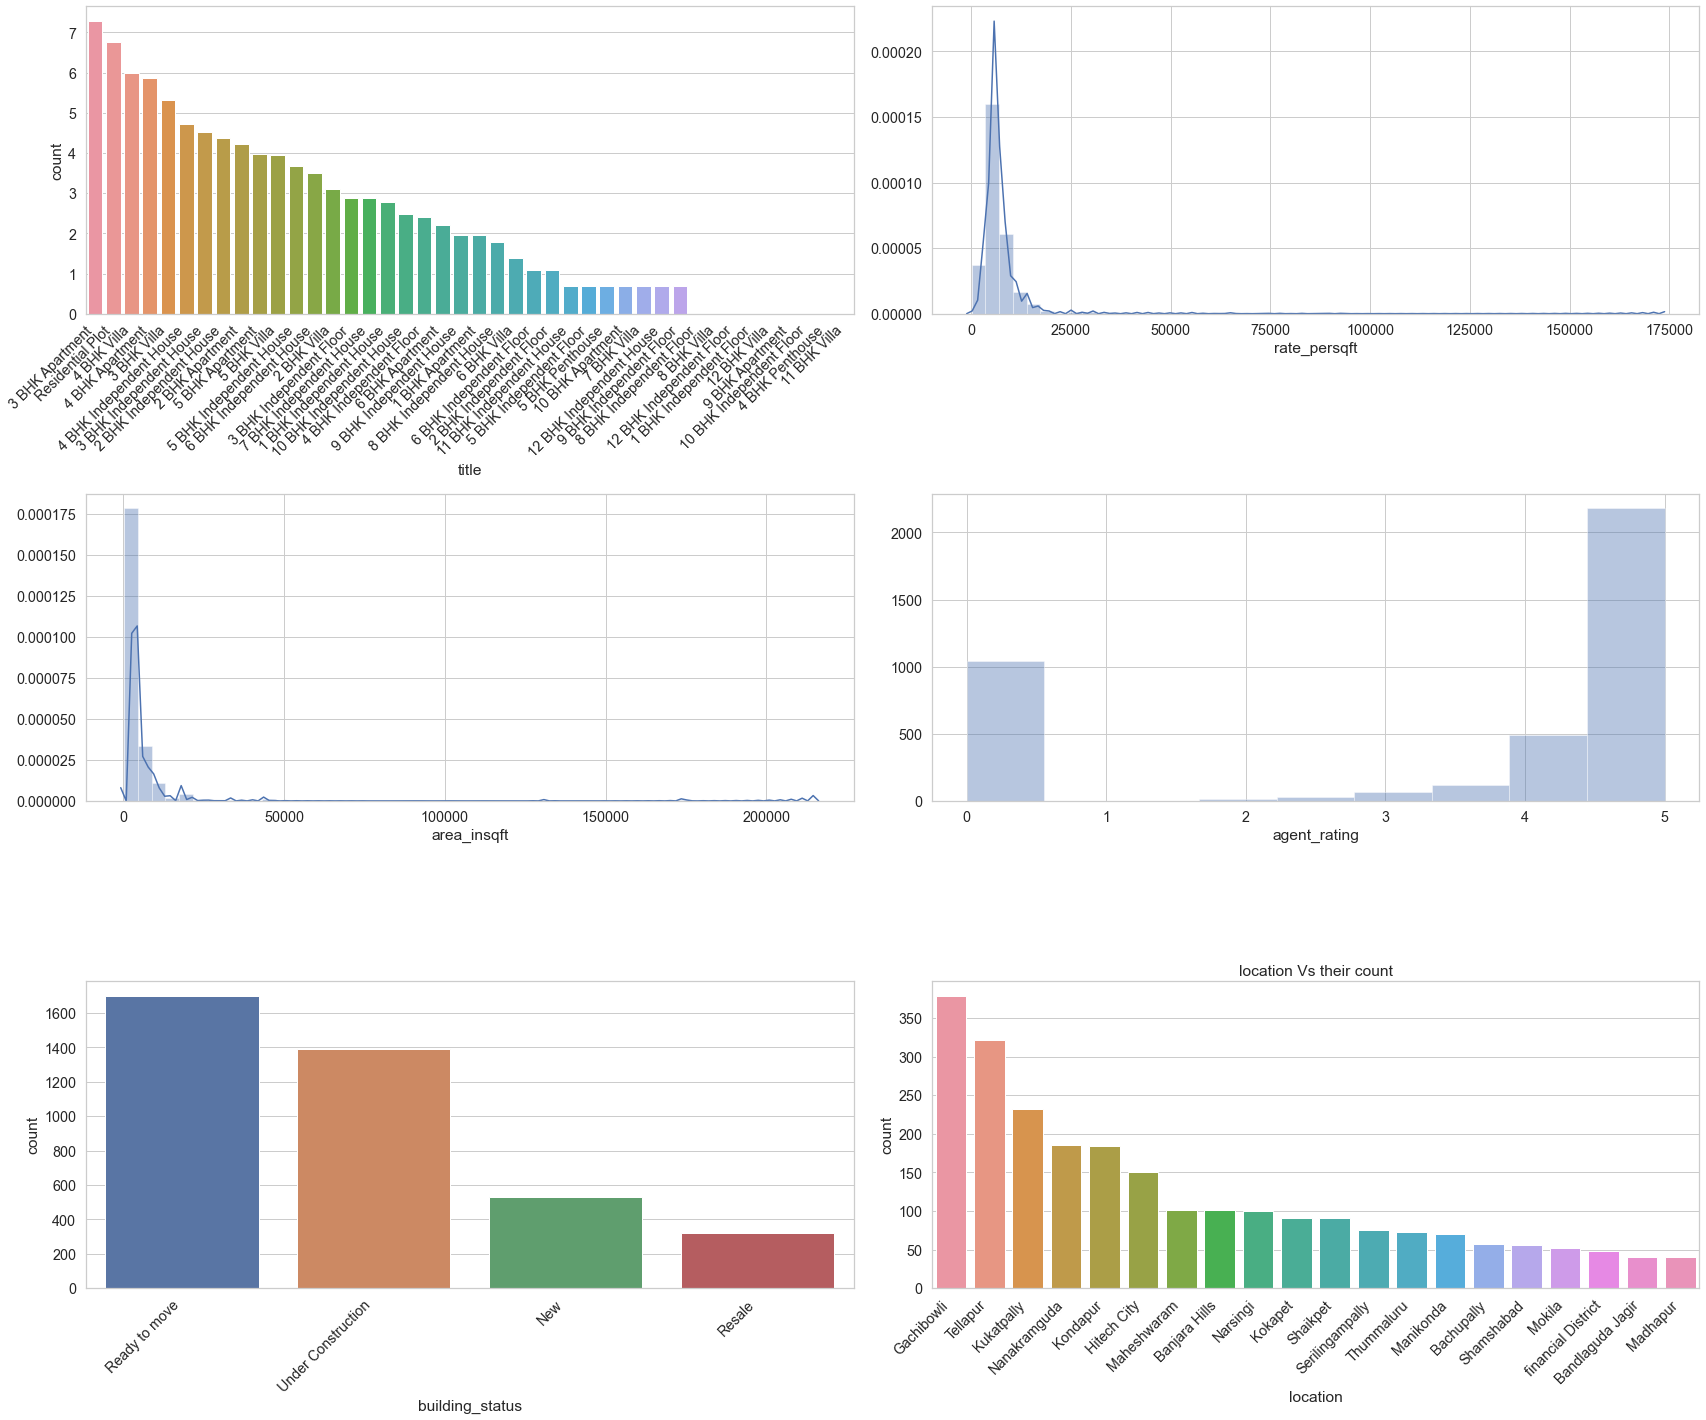

In [265]:
figure, axes = plt.subplots(nrows=3, ncols=2,figsize=(24,20))

temp = d['title'].value_counts().reset_index()
temp.columns = ['title','count']

fig = sns.barplot(x='title', y=np.log(temp['count']), data=temp, ax=axes[0][0])
plt.title('Type of Property Vs log of count')
plt.setp(fig.get_xticklabels(), rotation=45, horizontalalignment='right');


fig = sns.distplot(d['rate_persqft'], ax=axes[0][1])
plt.title('rate_persqft histogram')

fig = sns.distplot(d['area_insqft'], ax=axes[1][0])
plt.title('area_insqft histogram')

fig = sns.distplot(d['agent_rating'],kde=False, ax=axes[1][1])
plt.title('agent_rating histogram')


temp = d['building_status'].value_counts().reset_index()
temp.columns = ['building_status','count']
fig = sns.barplot(x='building_status', y=(temp['count']), data=temp, ax=axes[2][0])
plt.title('building_status Vs their count')
plt.setp(fig.get_xticklabels(), rotation=45, horizontalalignment='right');

temp = d['location'].value_counts().reset_index().head(20)
temp.columns = ['location','count']
fig = sns.barplot(x='location', y=(temp['count']), data=temp, ax=axes[2][1])
plt.title('location Vs their count')
plt.setp(fig.get_xticklabels(), rotation=45, horizontalalignment='right');

plt.tight_layout()

# 7. Properties with ratings 4.5 - 5 

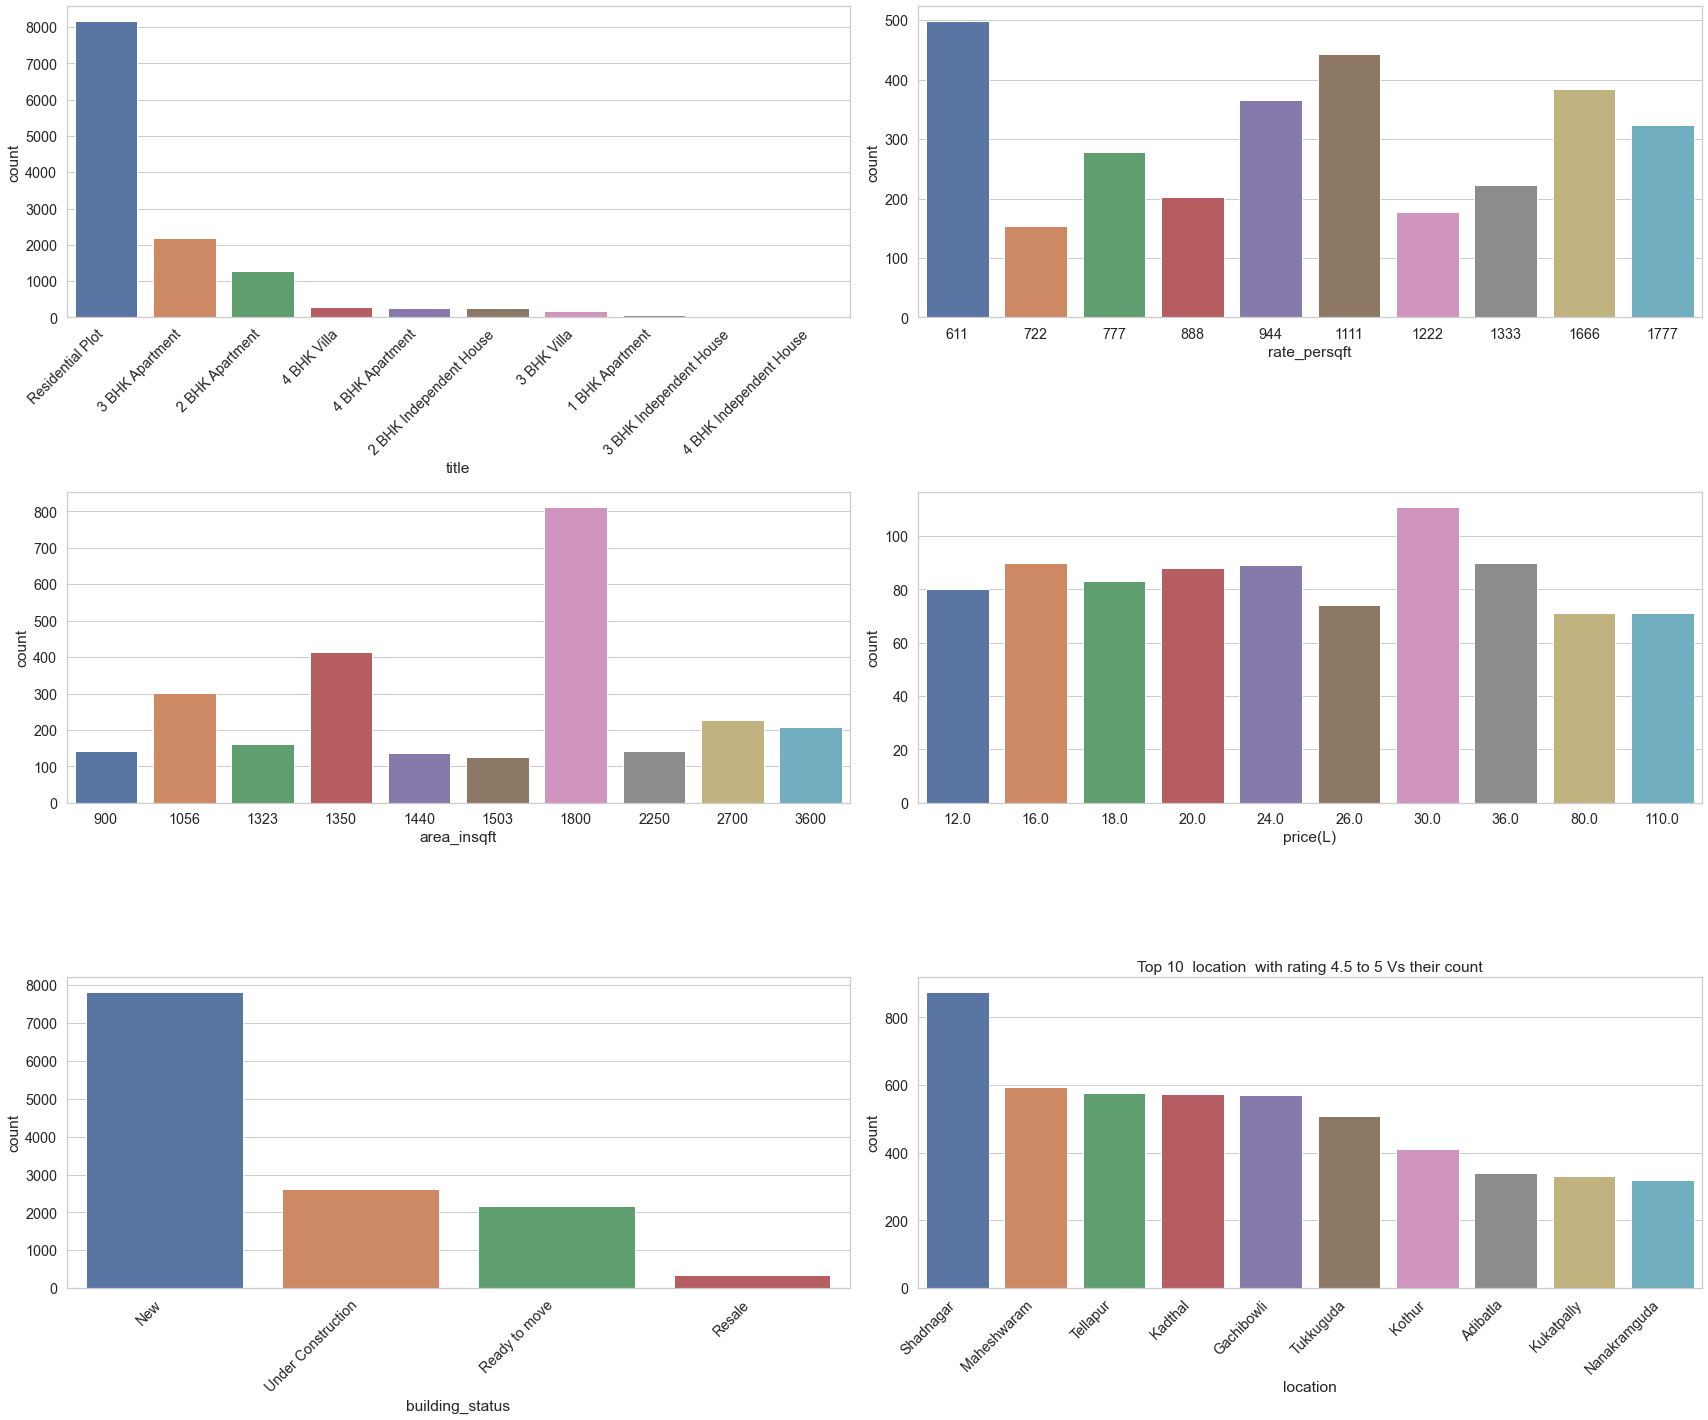

In [273]:
ratings = df[(df['agent_rating']>=4.5) & (df['agent_rating']<=5.0)]

figure, axes = plt.subplots(nrows=3, ncols=2,figsize=(24,20))

temp = ratings['title'].value_counts().reset_index()
temp.columns = ['title','count']
temp = temp.sort_values(by='count', ascending=False).head(10)
fig = sns.barplot(x='title', y=(temp['count']), data=temp, ax=axes[0][0])
plt.title('Top 10 properties with rating 4.5 to 5 Vs their count')
plt.setp(fig.get_xticklabels(), rotation=45, horizontalalignment='right');

temp = ratings['rate_persqft'].value_counts().reset_index().head(10)
temp.columns = ['rate_persqft','count']
temp = temp.sort_values(by='count', ascending=False).head(10)
fig = sns.barplot(x='rate_persqft', y=(temp['count']), data=temp, ax=axes[0][1])
plt.title('Top 10 rate_persqft with rating 4.5 to 5 Vs their count')

temp = ratings['area_insqft'].value_counts().reset_index().head(10)
temp.columns = ['area_insqft','count']
temp = temp.sort_values(by='count', ascending=False).head(10)
fig = sns.barplot(x='area_insqft', y=(temp['count']), data=temp, ax=axes[1][0])
plt.title('Top 10 area_insqft with rating 4.5 to 5  Vs their count')

temp = ratings['price(L)'].value_counts().reset_index().head(10)
temp.columns = ['price(L)','count']
temp = temp.sort_values(by='count', ascending=False).head(10)
fig = sns.barplot(x='price(L)', y=(temp['count']), data=temp, ax=axes[1][1])
plt.title('Top 10  price(L)  with rating 4.5 to 5 Vs their count')

temp = ratings['building_status'].value_counts().reset_index()
temp.columns = ['building_status','count']
temp = temp.sort_values(by='count', ascending=False).head(10)
fig = sns.barplot(x='building_status', y=(temp['count']), data=temp, ax=axes[2][0])
plt.title('Top 10  building_status  with rating 4.5 to 5 Vs their count')
plt.setp(fig.get_xticklabels(), rotation=45, horizontalalignment='right');

temp = ratings['location'].value_counts().reset_index().head(20)
temp.columns = ['location','count']
temp = temp.sort_values(by='count', ascending=False).head(10)
fig = sns.barplot(x='location', y=(temp['count']), data=temp, ax=axes[2][1])
plt.title('Top 10  location  with rating 4.5 to 5 Vs their count')
plt.setp(fig.get_xticklabels(), rotation=45, horizontalalignment='right');

plt.tight_layout()

Observations:
* Residential Plots are higly rated.
* plots in Shadnagar followed by Maheshwaram, Tellapur, Kaditaland and Gachbowli are higly rated.
* Most of the newly constructed properties have higher rating.
* Also, properties which are 1800, 1350, 1056 square feet have higher rating from agent.

***Observations from Exploratory Analysis:***
1. Shadnagar have Highest number of Residential Property within price range 0.16 to 20 lakhs.Also the rate per square root is low (range- 100 to 1500) with Area of about 2000 square feet.

    Proximity to industrial hubs such as Balanagar, Kothur and Kondurg renders Shadnagar a potential residential destination of the future. All basic amenities like hospitals, schools, colleges and markets are available nearby.This has led to an increased demand in the locality leading to the exponentially rise in property values. Thus investing here might get you a handsome return on investment.
    

2.  Adibatla,Maheshwaram and Tukkuguda has Properties within range 20Lakh -50Lakhs.



3. Tellapur has properties of range 60 Lakh- 7 Crore.This area is located near the hubs of Information Technology (IT) such as Madhapur and Gachibowli. Many of the IT majors such as Infosys, Wipro and Microsoft have set up base here, making Tellapur the choice destination for IT professionals.

    Besides its proximity to Gachibowli, Madhapur and Lingampally, One of the advantages is being close to prestigious institutions and IT hubs is that the return on investment would appreciate. There would be a greater demand for rentals in this locality as more people from other states would want to rent places closer to their place of work rather than commute.


4. Properties in Gachibowli have highest cost in range 70 90 lakhs to 7 crore. many of the prooerties in this price range
    are Ready to move or under construction.
    
    
5. Properties according to ratings
    * Residential Plots are higly rated.
    * plots in Shadnagar followed by Maheshwaram, Tellapur, Kaditaland and Gachbowli are higly rated.
    * Almost all of the newly constructed properties have higher rating.
    * Also, properties which are 1800, 1350, 1056 square feet have higher rating from agent.